# Capstone Project

# Heart Failure Prediction

#### Objective: To analyze risk factors for heart failure and build a model to predict chances of heart failure in an individual.

Attributes:

Features:

Age | Objective Feature | age | int (days)><br>
Height | Objective Feature | height | int (cm) |<br>
Weight | Objective Feature | weight | float (kg) |<br>
Gender | Objective Feature | gender | categorical code |<br>
Systolic blood pressure | Examination Feature | ap_hi | int |<br>
Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
Smoking | Subjective Feature | smoke | binary |<br>
Alcohol intake | Subjective Feature | alco | binary |<br>
Physical activity | Subjective Feature | active | binary |<br>
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>

Importing Libraries

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
import colorama
from colorama import Fore, Style
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [3]:
plt.rcParams['figure.figsize'] = [15,8]

Loading the DataSet

In [4]:
df=pd.read_csv("cardio_train.csv",sep=';')
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Mapping for reverse encoding
gender = {1: 'female', 2: 'male'}
cholesterol = {1: 'normal', 2: 'above_normal', 3: 'high'}
gluc = {1: 'normal', 2: 'above_normal', 3: 'high'}
smoke = {0: 'no', 1: 'yes'}
alco = {0: 'no', 1: 'yes'}
active = {0: 'no', 1: 'yes'}
cardio = {0: 'no', 1: 'yes'}

# Reverse encode categorical columns
df['gender'] = df['gender'].map(gender)
df['cholesterol'] = df['cholesterol'].map(cholesterol)
df['gluc'] = df['gluc'].map(gluc)
df['smoke'] = df['smoke'].map(smoke)
df['alco'] = df['alco'].map(alco)
df['active'] = df['active'].map(active)
df['cardio'] = df['cardio'].map(cardio)

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,male,168,62.0,110,80,normal,normal,no,no,yes,no
1,1,20228,female,156,85.0,140,90,high,normal,no,no,yes,yes
2,2,18857,female,165,64.0,130,70,high,normal,no,no,no,yes
3,3,17623,male,169,82.0,150,100,normal,normal,no,no,yes,yes
4,4,17474,female,156,56.0,100,60,normal,normal,no,no,no,no


Dropping the insignificant features

In [7]:
df=df.drop('id',axis=1)

In [8]:
df.duplicated().value_counts()

False    69976
True        24
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(69976, 12)

In [10]:
# As the age is in days so, we have to convert them into years

In [11]:
df['age'] = df['age'] // 365
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,male,168,62.0,110,80,normal,normal,no,no,yes,no
1,55,female,156,85.0,140,90,high,normal,no,no,yes,yes
2,51,female,165,64.0,130,70,high,normal,no,no,no,yes
3,48,male,169,82.0,150,100,normal,normal,no,no,yes,yes
4,47,female,156,56.0,100,60,normal,normal,no,no,no,no


In [12]:
df.shape

(69976, 12)

In [13]:
# From this got to know that there are :-
             # 12 columns
             # 69976 rows

Understanding the features

In [14]:
df.describe()

,age,height,weight,ap_hi,ap_lo
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,52.840874,164.359152,74.208519,128.820453,96.636261
std,6.767103,8.211218,14.397211,154.037729,188.504581
min,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


In [15]:
df.describe(include='object')

,gender,cholesterol,gluc,smoke,alco,active,cardio
count,69976,69976,69976,69976,69976,69976,69976
unique,2,3,3,2,2,2,2
top,female,normal,normal,no,no,yes,no
freq,45509,52361,59455,63807,66212,56241,35004


checking for null values

In [16]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no null values

In [17]:
# as there are no null values arbitatily adding some null values

In [18]:
# adding 10 null values
df.at[45, 'gender'] = np.nan
df.at[56, 'alco'] = np.nan
df.at[120, 'alco'] = np.nan
df.at[490, 'height'] = np.nan
df.at[5000, 'height'] = np.nan
df.at[690, 'height'] = np.nan
df.at[487, 'ap_lo'] = np.nan
df.at[1400, 'ap_lo'] = np.nan
df.at[4540,'ap_hi']=np.nan
df.at[1454,'ap_hi']=np.nan
df.isnull().sum()

age            0
gender         1
height         3
weight         0
ap_hi          2
ap_lo          2
cholesterol    0
gluc           0
smoke          0
alco           2
active         0
cardio         0
dtype: int64

In [19]:
# randomly added null values to some categorical and numerical columns

In [20]:
# as gender is a categorical column replacing the null values with most frequency value
mode_value=df["gender"].mode()[0]
df["gender"].fillna(mode_value, inplace=True)
df.isnull().sum()

age            0
gender         0
height         3
weight         0
ap_hi          2
ap_lo          2
cholesterol    0
gluc           0
smoke          0
alco           2
active         0
cardio         0
dtype: int64

In [21]:
# as alco is a categorical column replacing the null values with most frequency value
mode_value=df["alco"].mode()[0]
df["alco"].fillna(mode_value, inplace=True)
df.isnull().sum()

age            0
gender         0
height         3
weight         0
ap_hi          2
ap_lo          2
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [22]:
# as height,ap_hi,ap_lo are numerical columns,replacing the null values with median
df["height"].fillna(df["height"].median(), inplace=True)
df["ap_hi"].fillna(df["ap_hi"].median(), inplace=True)
df["ap_lo"].fillna(df["ap_lo"].median(), inplace=True)
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [23]:
#now there are no null values in the data

In [24]:
df.shape

(69976, 12)

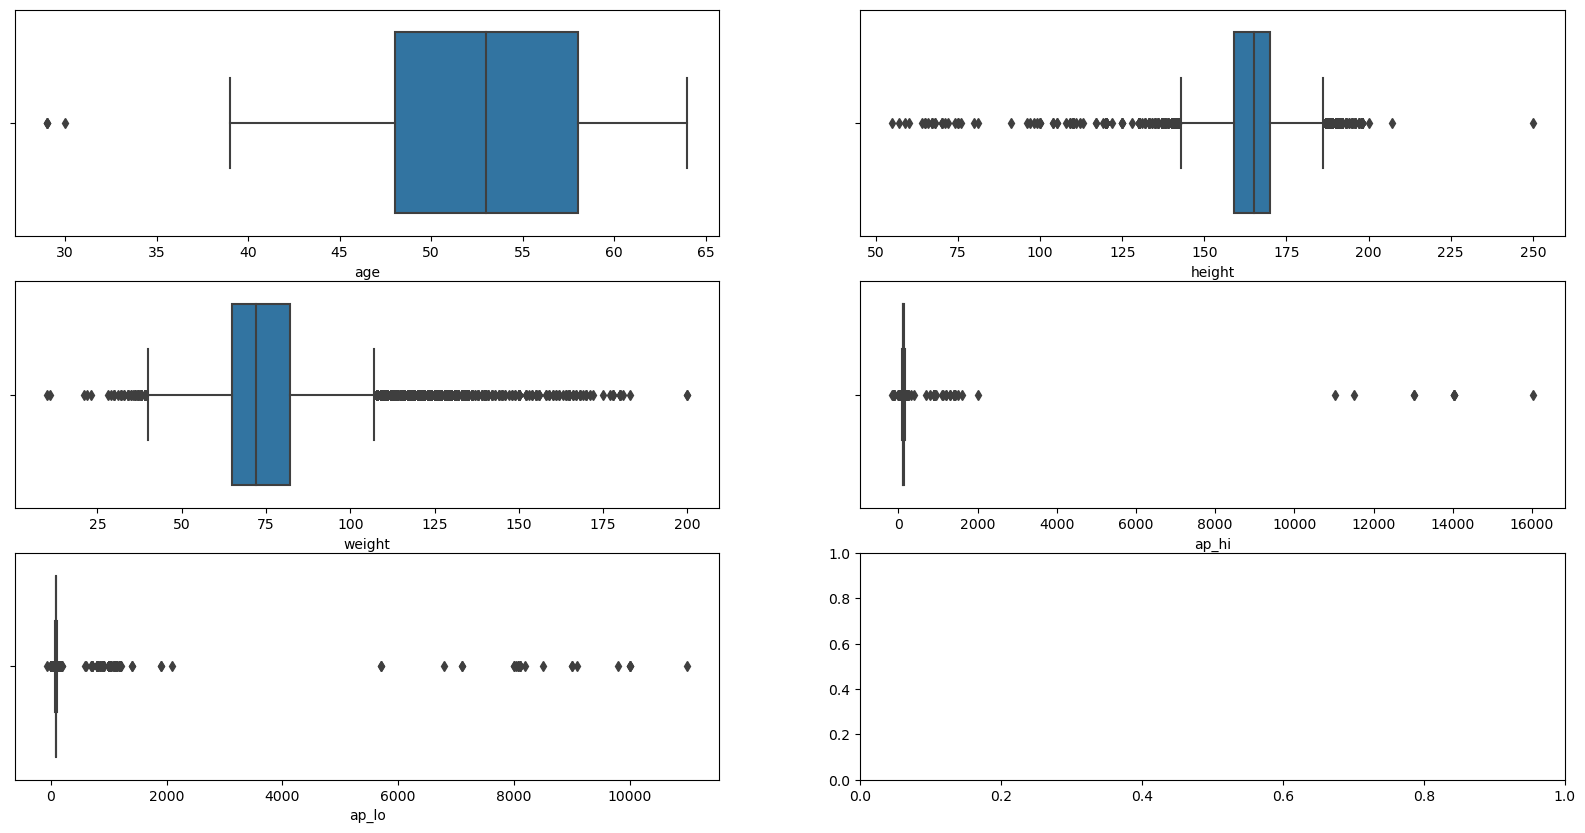

In [25]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for var,subplot in zip(df.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.boxplot(x=var,data=df,ax=subplot)

plt.show()

#### Outliers

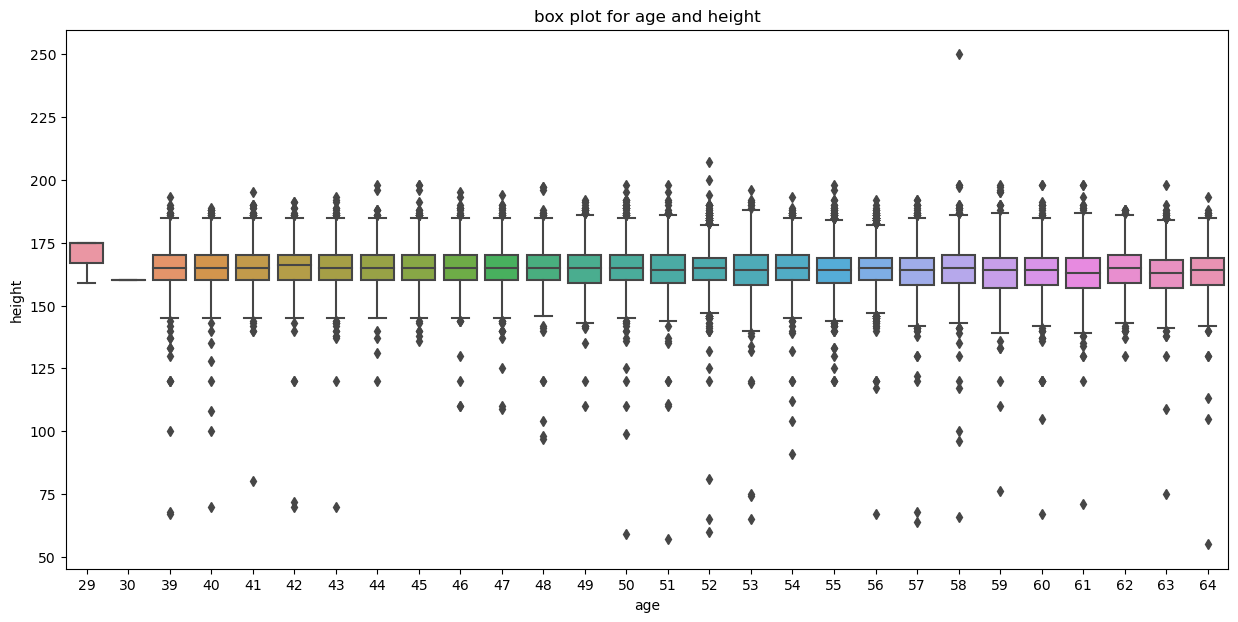

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(x='age',y='height',data=df)
plt.title("box plot for age and height")
plt.show()

height cannot be less than 100cm (3 feet) for age grater than 39 and height cannot be more than 200 cm(7 feet) at any age hence removing these 
so considering this as outliers

In [27]:
# removing the outliers
df = df[~((df['height']<100) | (df['height']>200))]

In [28]:
df.shape

(69945, 12)

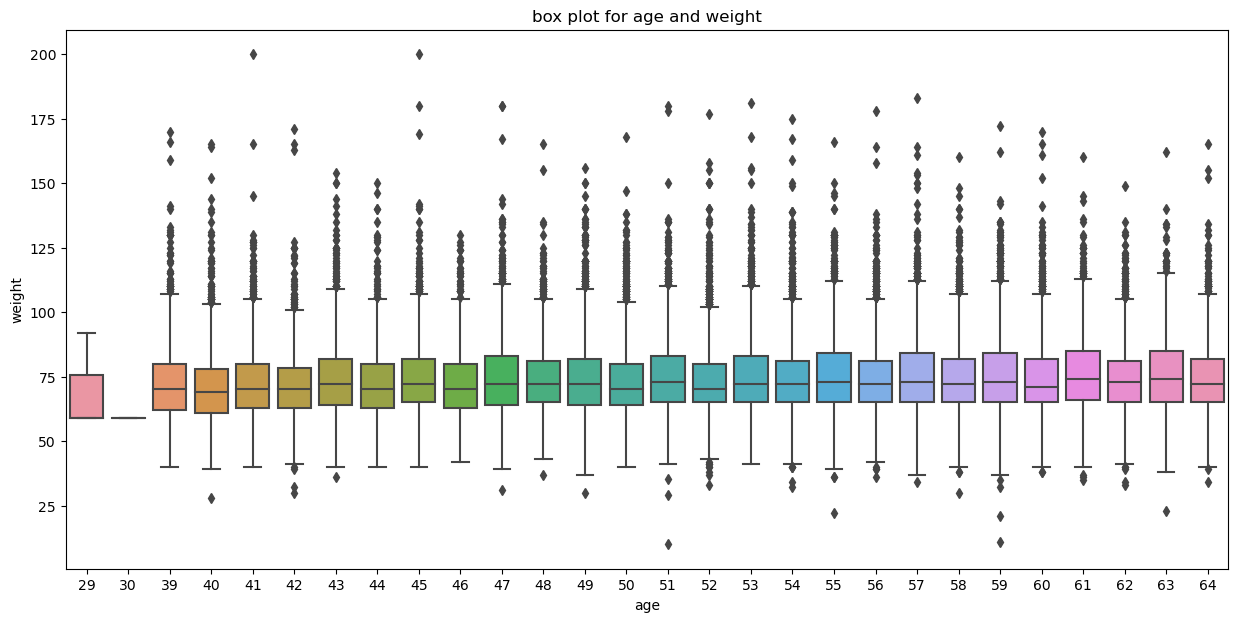

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(x='age',y='weight',data=df)
plt.title("box plot for age and weight")
plt.show()

weight cannot be less than 30 for age greater than 40 and  weight cannot be greater than 175 
considering these as outliers 

In [30]:
# removing the outliers
df = df[~((df['weight']<30) | (df['weight']>175))]

In [31]:
df.shape

(69927, 12)

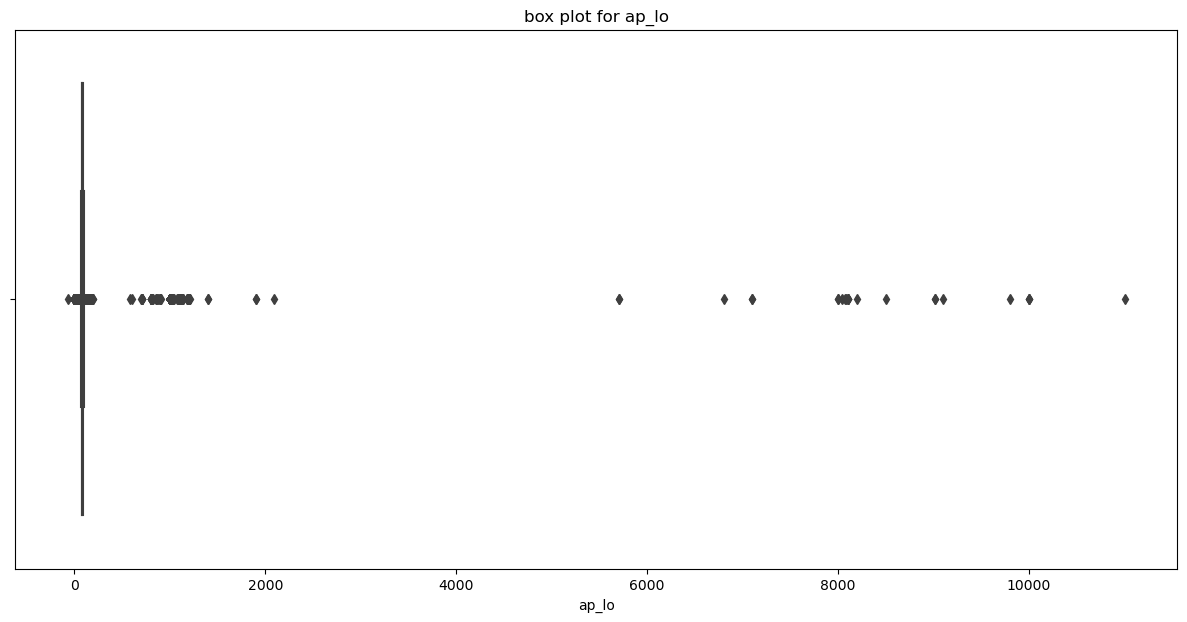

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(x='ap_lo',data=df)
plt.title("box plot for ap_lo")
plt.show()

diastolic bp cannnot be less than 60 and greater than 120
considering these are outliers

In [33]:
df = df[~((df['ap_lo']<60) | (df['ap_lo']>120))]

In [34]:
df.shape

(68699, 12)

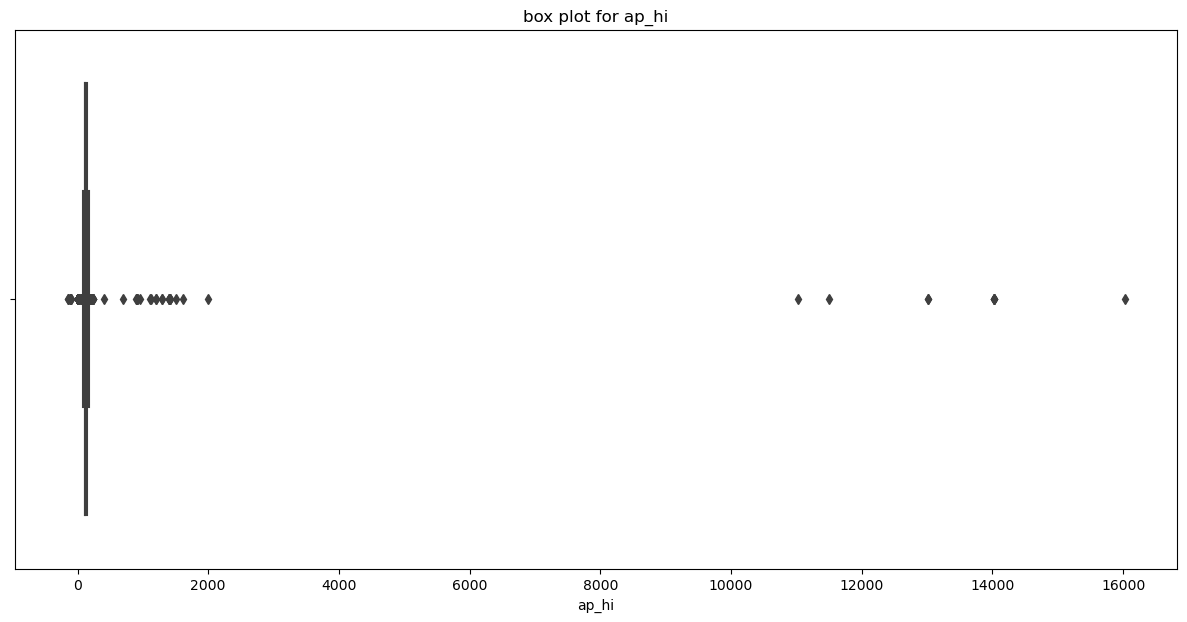

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(x='ap_hi',data=df)
plt.title("box plot for ap_hi")
plt.show()

Systolic bp cannnot be less than 70 and greater than 200
considering these are outliers

In [36]:
df = df[~((df['ap_hi']<70) | (df['ap_hi']>200))]

In [37]:
df.shape

(68453, 12)

In [38]:
df=df.reset_index(drop=True)

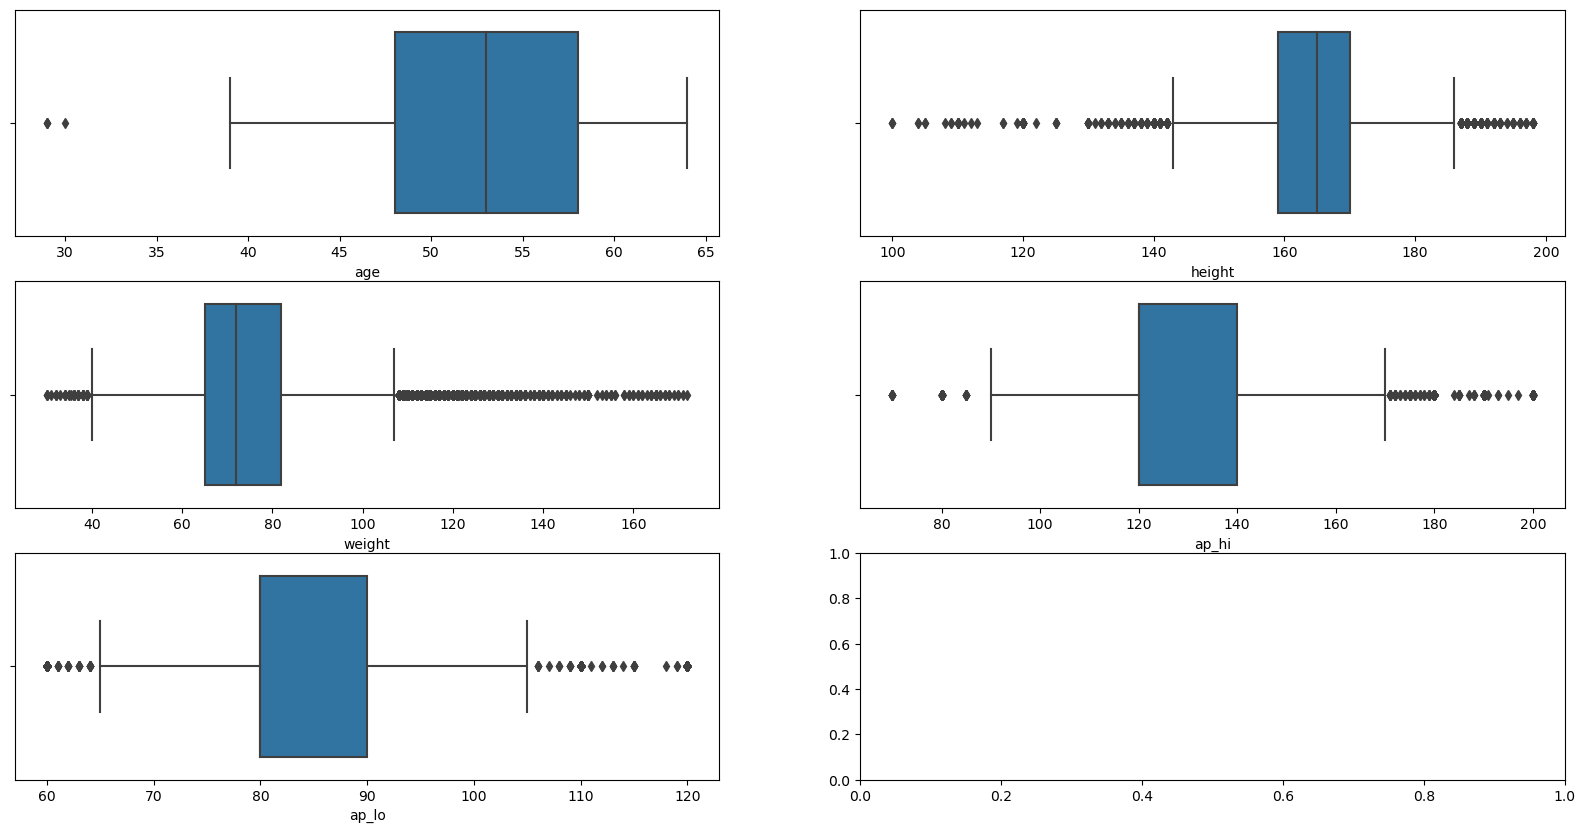

In [39]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for var,subplot in zip(df.select_dtypes(include=np.number).columns,ax.flatten()):
    sns.boxplot(x=var,data=df,ax=subplot)

plt.show()

In [40]:
# Now we can see that all the ouliers are gone and our data is perfectly capped..

In [41]:
# taking the numerical columns in num
num = df.select_dtypes(include=np.number)
# taking the categorical columns in cat
cat = df.select_dtypes(exclude=np.number)

#### Univariate analysis

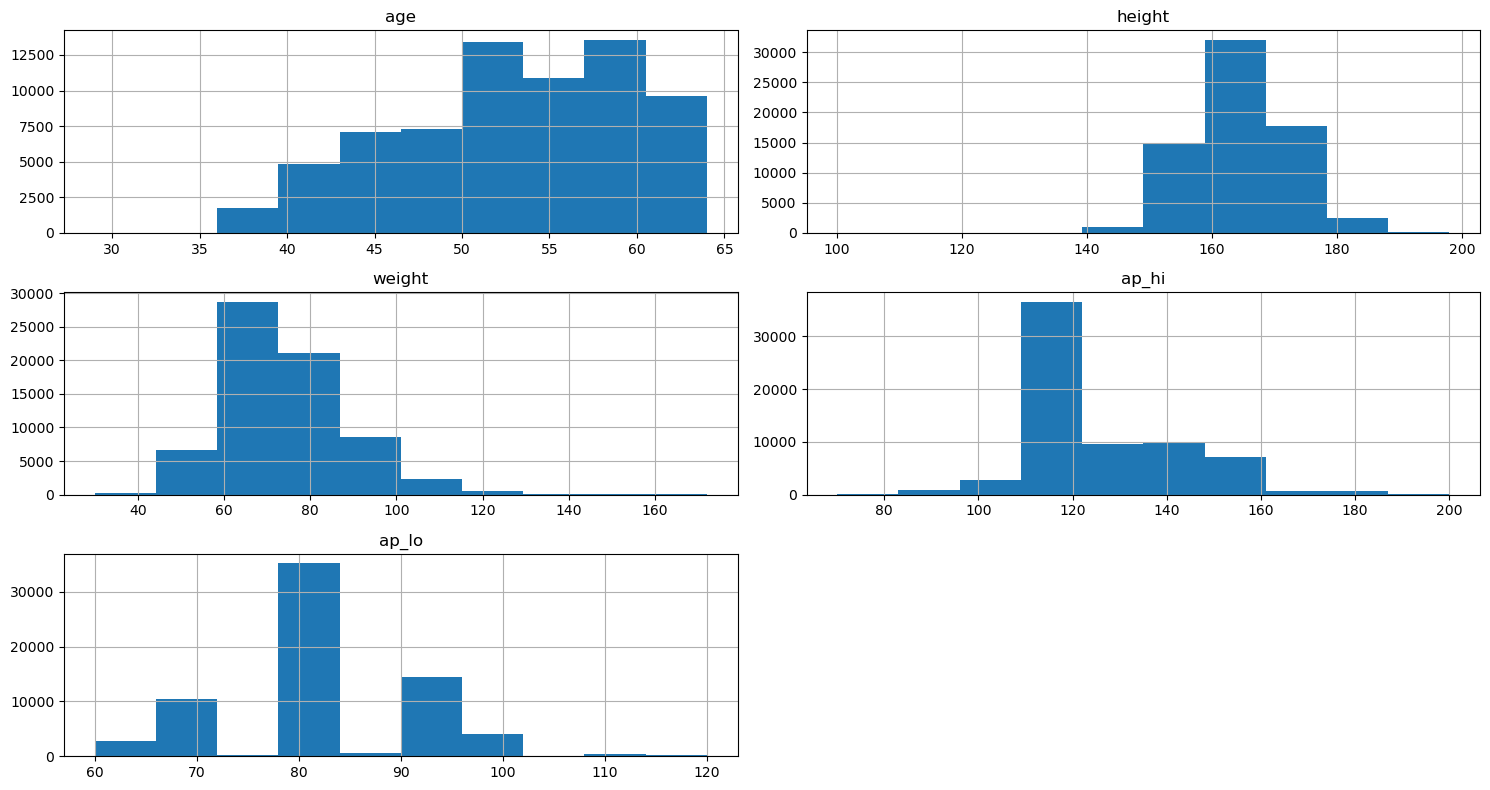

In [42]:
num.hist()
plt.title("univariate analysis for numeric features")
plt.tight_layout()
plt.show()


In [43]:
# Inferences

# 1) Age: We can see the age is between 38 to 65 & major frequency of data is in between 50 to 62
# 2) Height: Here we can see in height plot the major frequency of data is in between 150 to 175
# 3) Weight:  Here we can see in weight plot the major frequency of data is in between 55 to 85
# 4) ap_hi: Here we can see in ap_hi plot the major frequency of data is in between 80 to 180
# 5) ap_lo: Here we can see in ap_lo plot the major frequency of data is in between 60 to 120

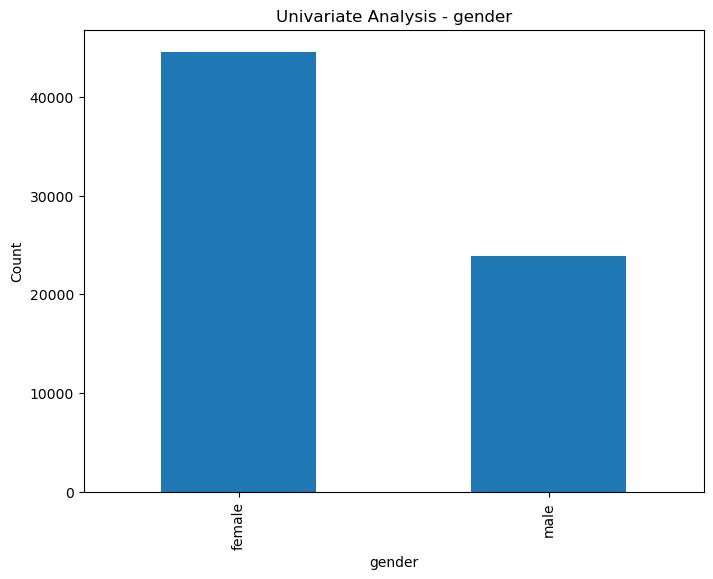

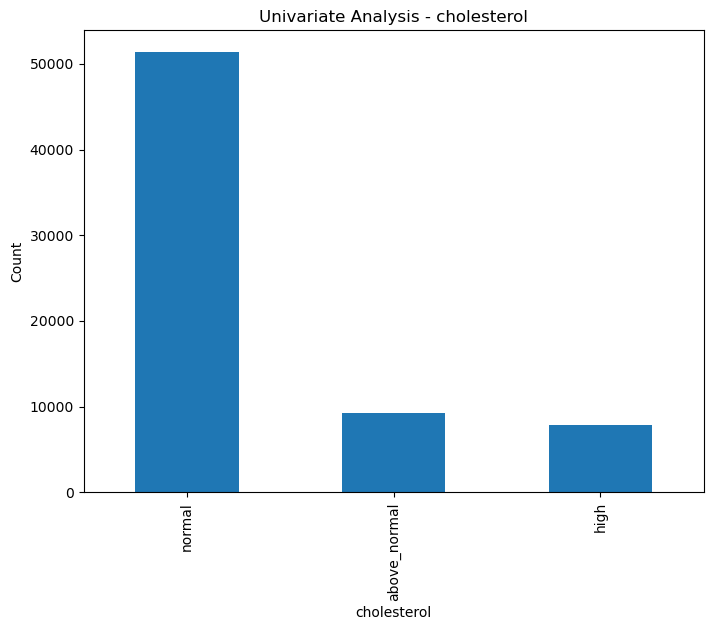

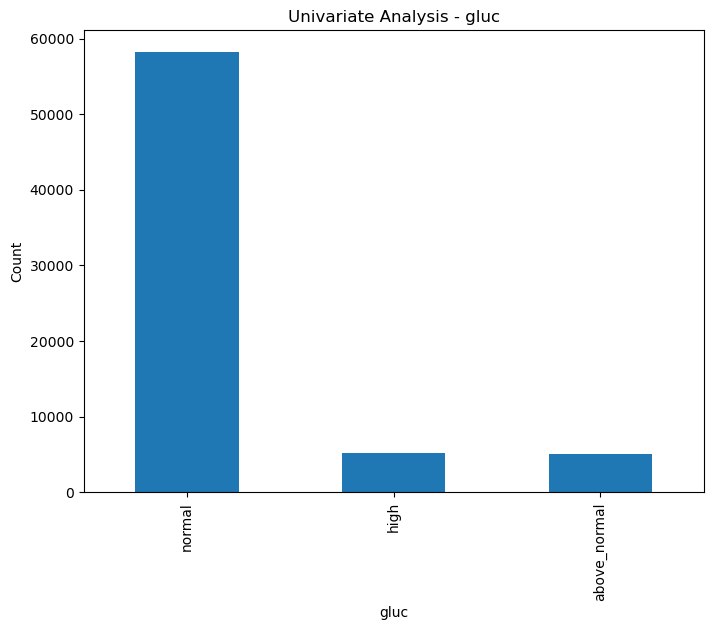

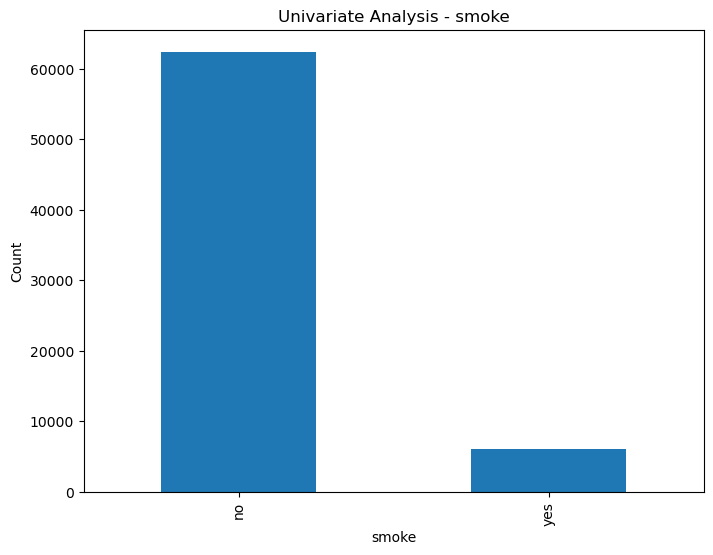

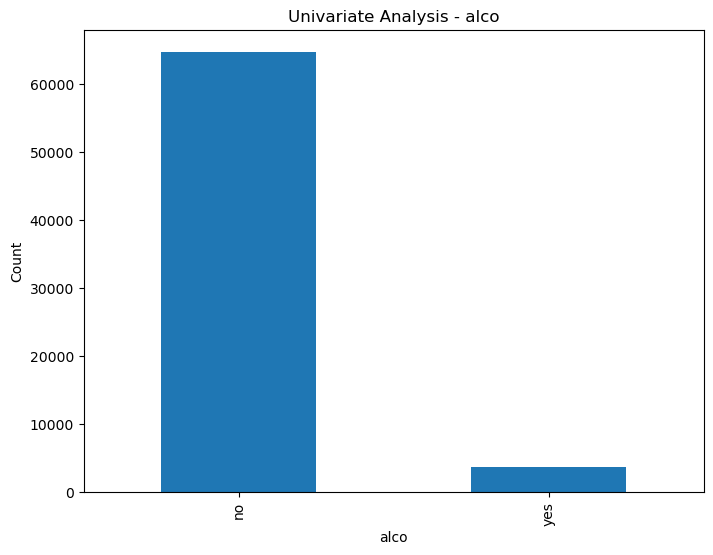

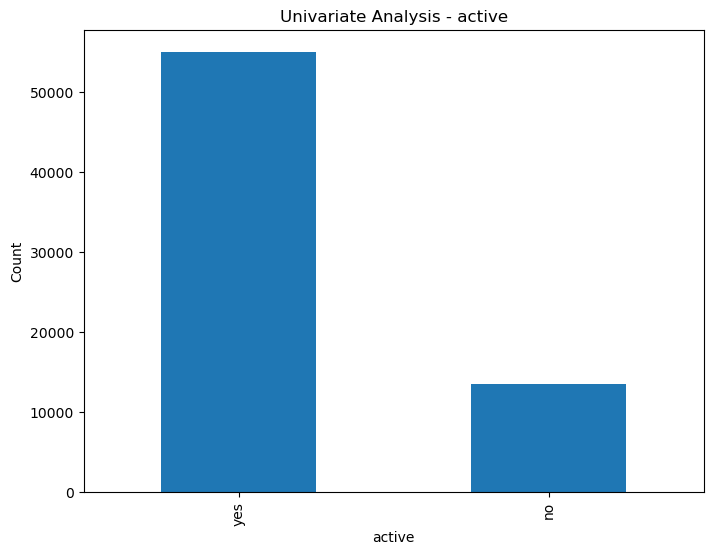

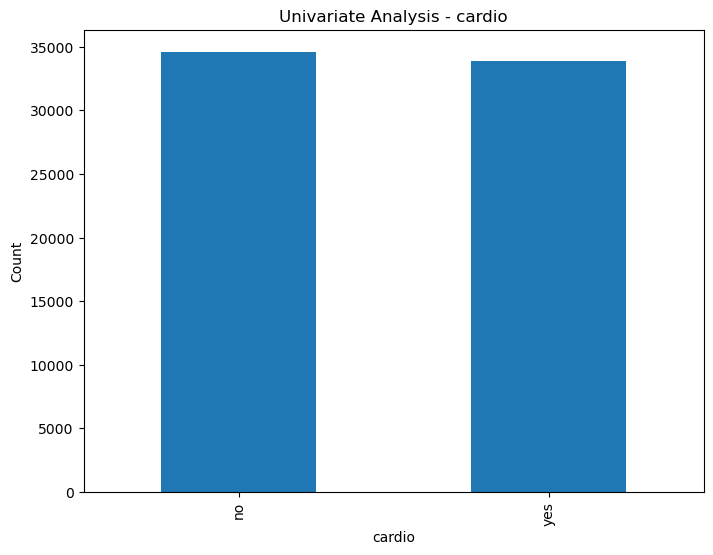

In [44]:
# Univariate analysis for categorical features

for feature in cat:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Univariate Analysis - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    


In [45]:
# 1) gender: we can see that the no. of female is considerably high than male i.e >4000 where about 2500 for male 
# 2) cholestrol: noraml is about 35000, above normal is about 10000 & high is < 1000
# 3) glucose: normal is about 60000, high is about 5000 & above normal is about same as high
# 4) smoke: 'Person who smokes' is about 8000 and 'Person who do not smoke' is above 60000
# 5) alco: 'Person  who takes alochol' is about 3000 and 'Person who do not takes alcohol' is above 60000
# 6) active: 'Yes' is above 50000 and 'No' is above 10000
# 7) cardio: the columns 'Yes & No' is about same i.e almost 30000

#### BIVARIATE ANLYSIS

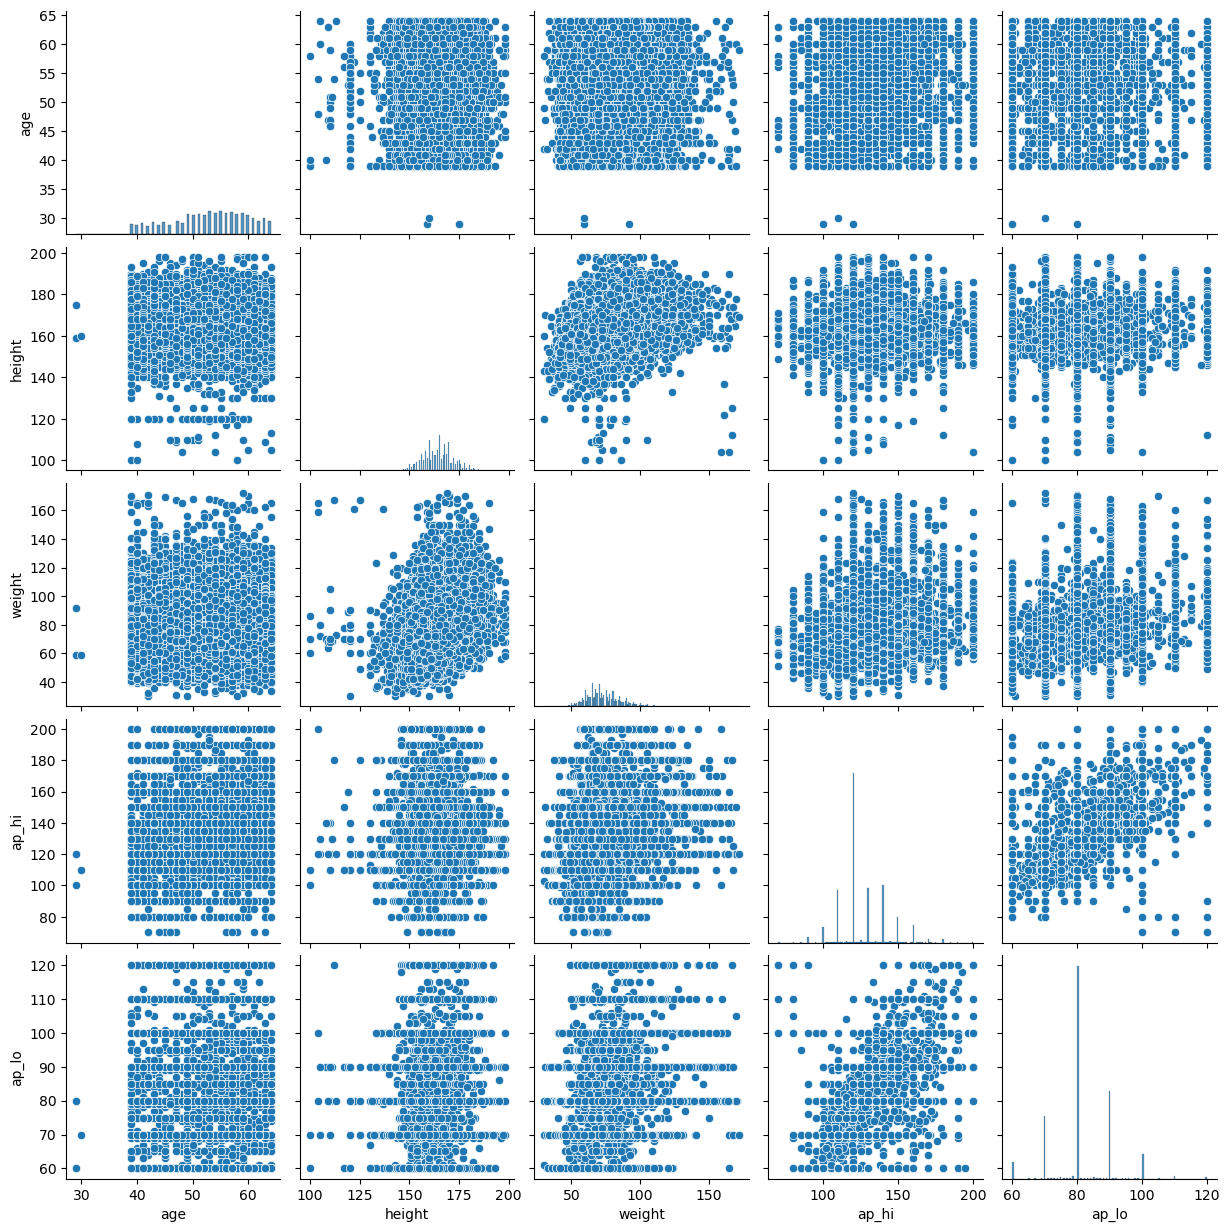

In [46]:
# Bivariate analysis for numeric vs numeric (num vs num)

numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
sns.pairplot(df[numeric_features])
plt.show()


In [47]:
# From this analysis we are not getting clear idea , will go for heatmap to have more clear picture..

In [48]:
# Using Heatmap for better understanding

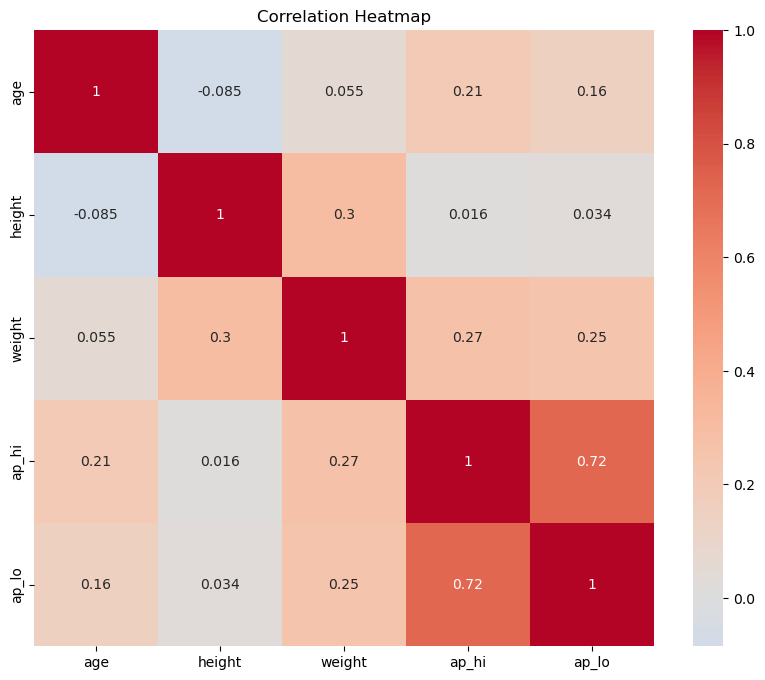

In [49]:
correlation_matrix = num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [50]:
# from this we can clearly see that there is no strong correlation between num varibales, they are independent of each other
# Most are neutral or weakly correlated except ap_lo with ap_hi which is giving a corr of about 0.7

In [51]:
np.linalg.det(num.corr())

0.3787736524198203

In [52]:
# Bivariate analysis for categorical vs categorical (using crosstab)
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active','cardio']
categ=categorical_features
for feature1 in categ:
    for feature2 in categ:
        if feature1 != feature2:
            cross_tab = pd.crosstab(df[feature1], df[feature2])
            print(cross_tab)
            print()
    categ.remove(feature1)

cholesterol  above_normal  high  normal
gender                                 
female               6230  5420   32934
male                 3029  2419   18421

gluc    above_normal  high  normal
gender                            
female          3329  3568   37687
male            1710  1639   20520

smoke      no   yes
gender             
female  43791   793
male    18643  5226

alco       no   yes
gender             
female  43457  1127
male    21341  2528

active    no    yes
gender             
female  8838  35746
male    4625  19244

cardio     no    yes
gender              
female  22646  21938
male    11960  11909

cholesterol   above_normal  high  normal
gluc                                    
above_normal          2353   496    2190
high                   370  3378    1459
normal                6536  3965   47706

smoke            no   yes
gluc                     
above_normal   4517   522
high           4821   386
normal        53096  5111

alco             no   yes
gluc   

In [53]:
#inferences
# cholestrol vs gender
# most of the female and male as normal cholestrol level
# gluc vs gender
# most of the female and male as normal glucose level
# smoke vs gender
# most of the female and male are non smokers
# alco vs gender 
# most of the female and male are non alcholic people
# active vs gender
# most of the female and male are doing physical activity
# cholestrol vs gluc
# most of the people have cholestrol and gluc levels are normal
# smoke vs gluc
# most of the non smokers have normal glucose level
# alco vs gluc
# most of the non alcholic have normal glucose level
# active vs gluc
# most of the active people has normal glucose level
# cholestrol vs alco
# most of the non alcoholic people has normal cholestrol level
# smoke vs alco
# most of the people are non alcoholic and non smokers
# active vs alco
# people who are non alcoholic are more active


In [54]:
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active','cardio']

In [55]:
nume=['age', 'height', 'weight', 'ap_hi', 'ap_lo']

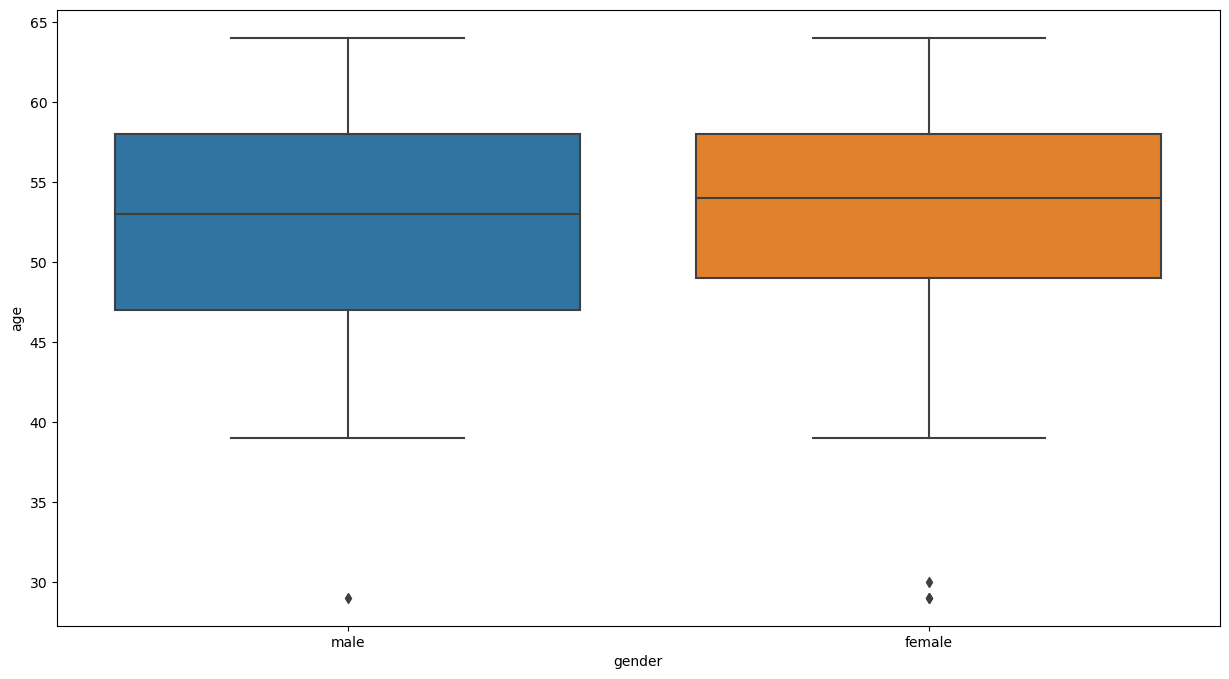

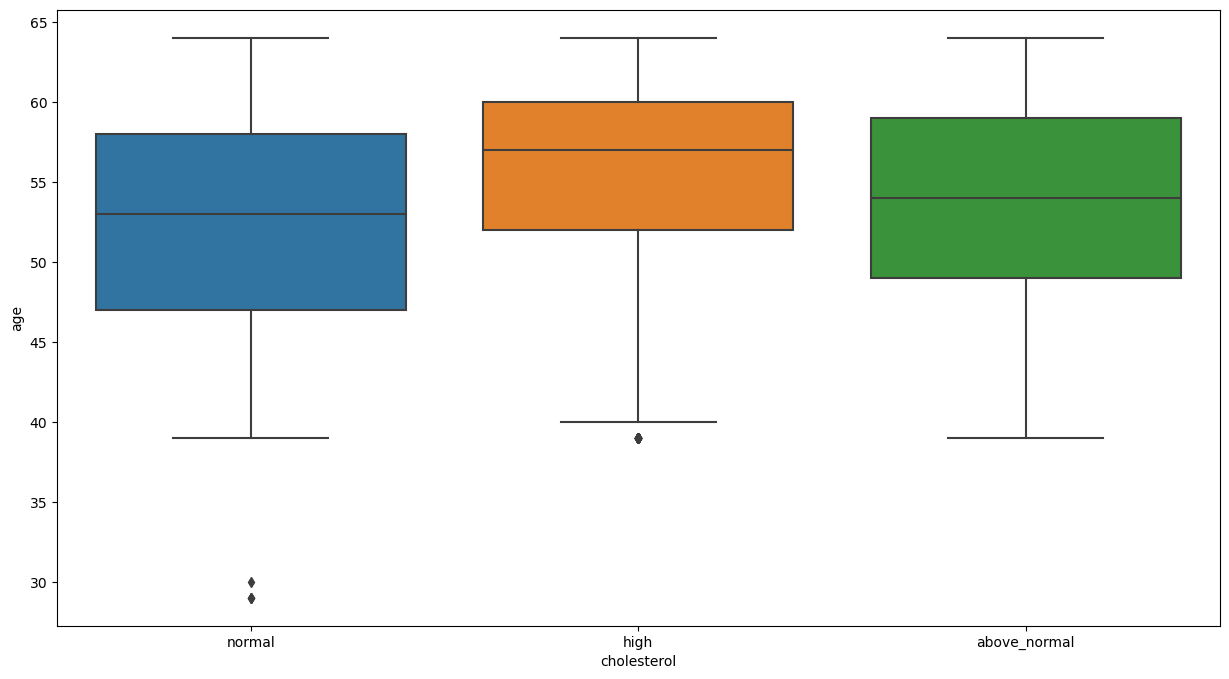

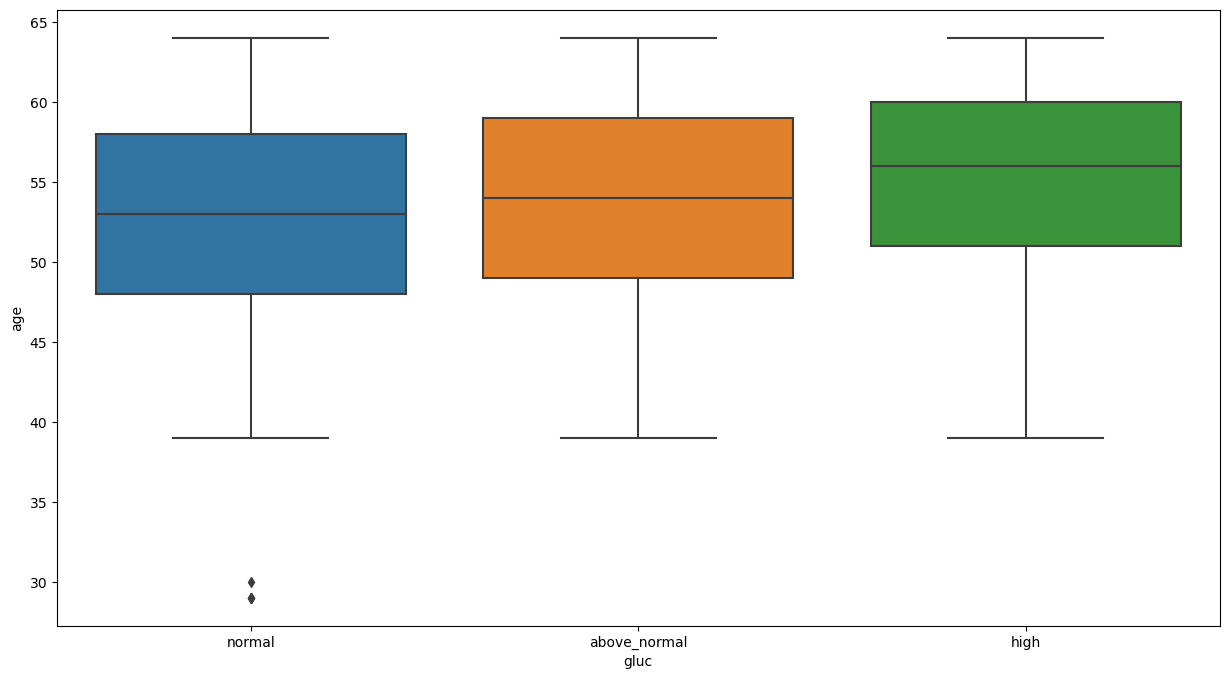

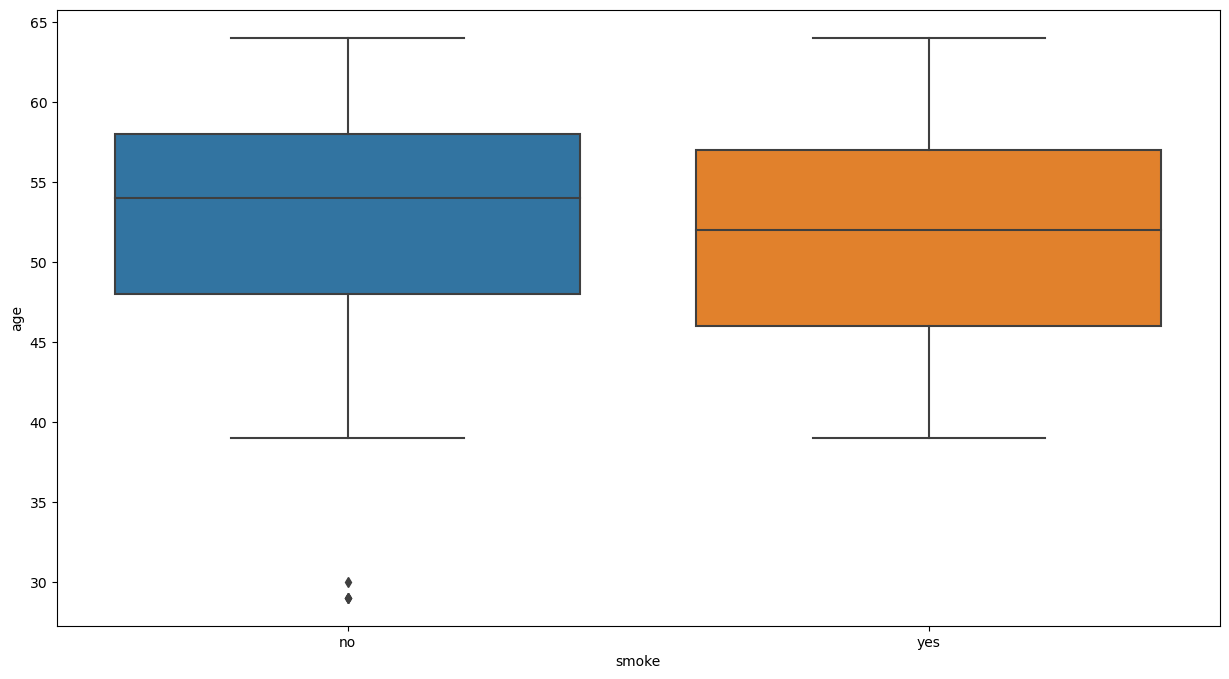

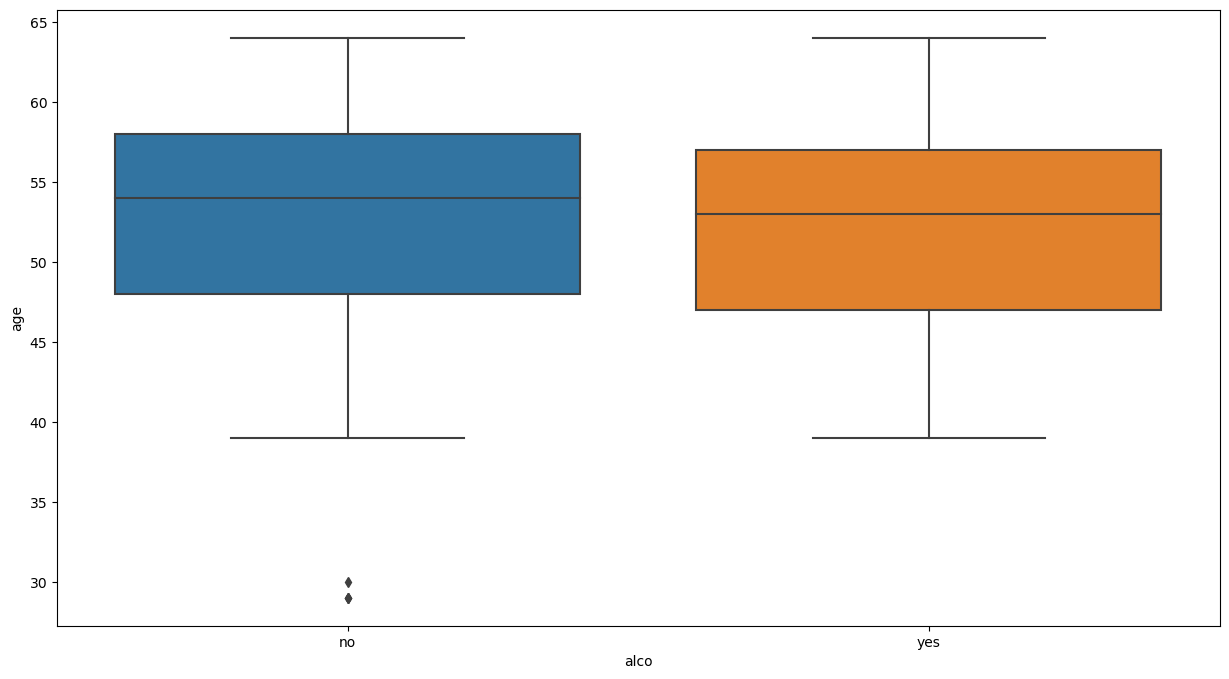

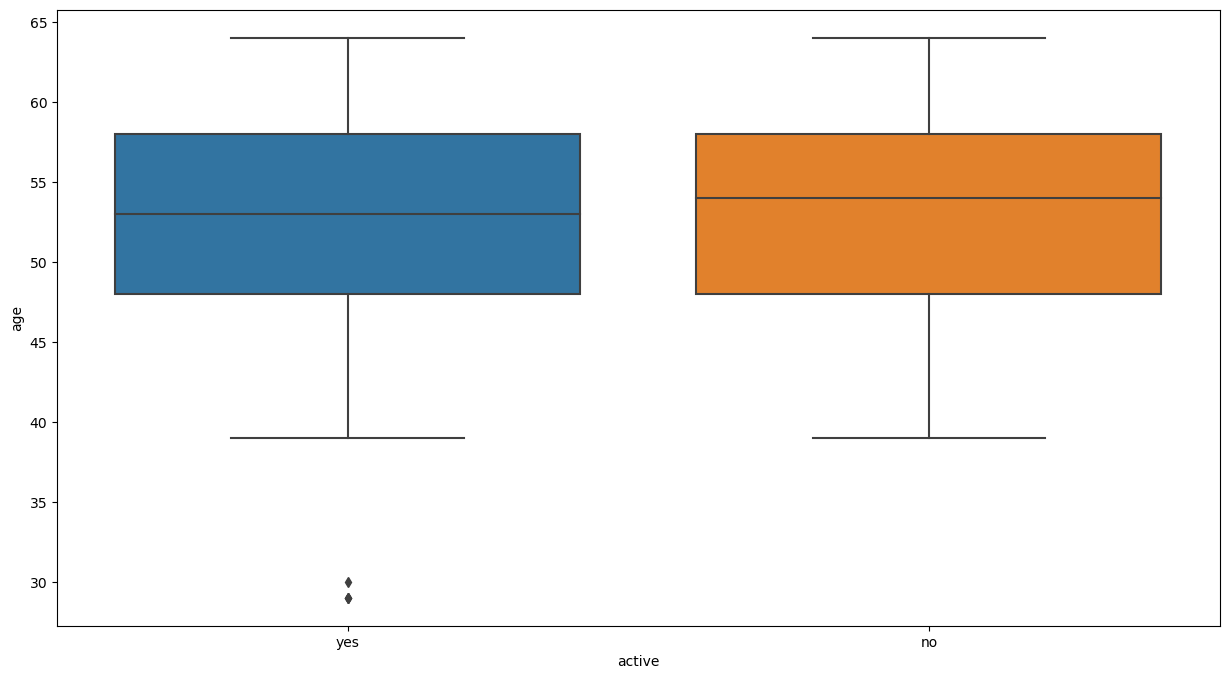

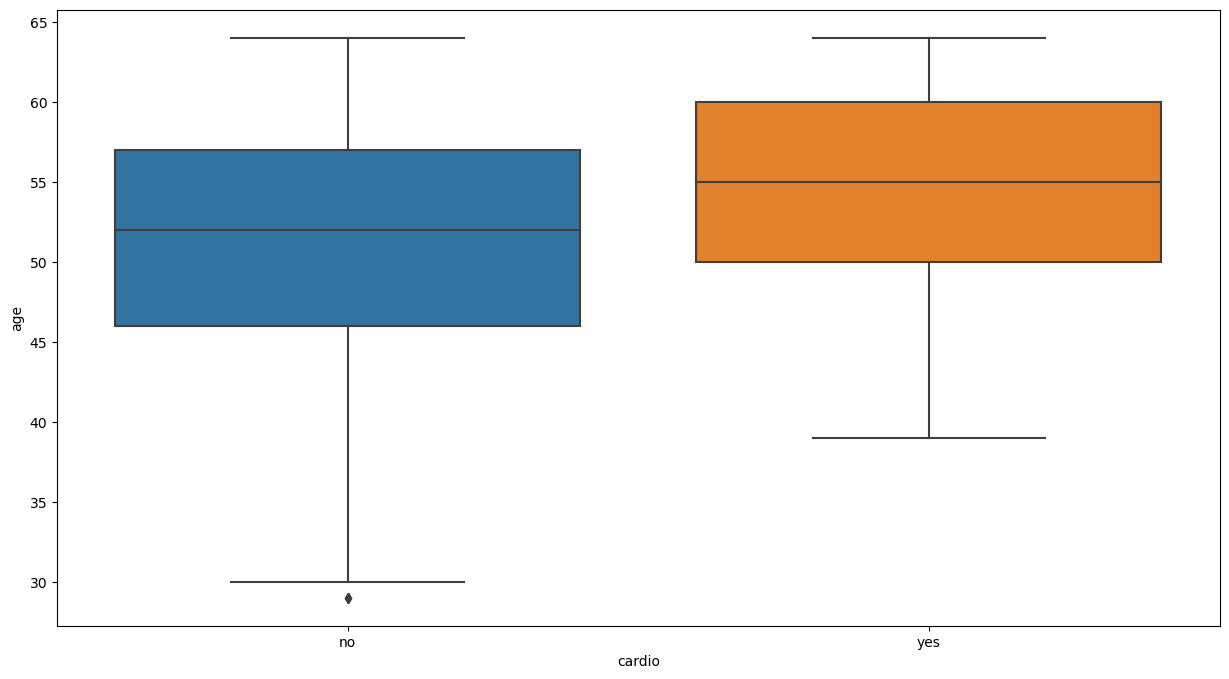

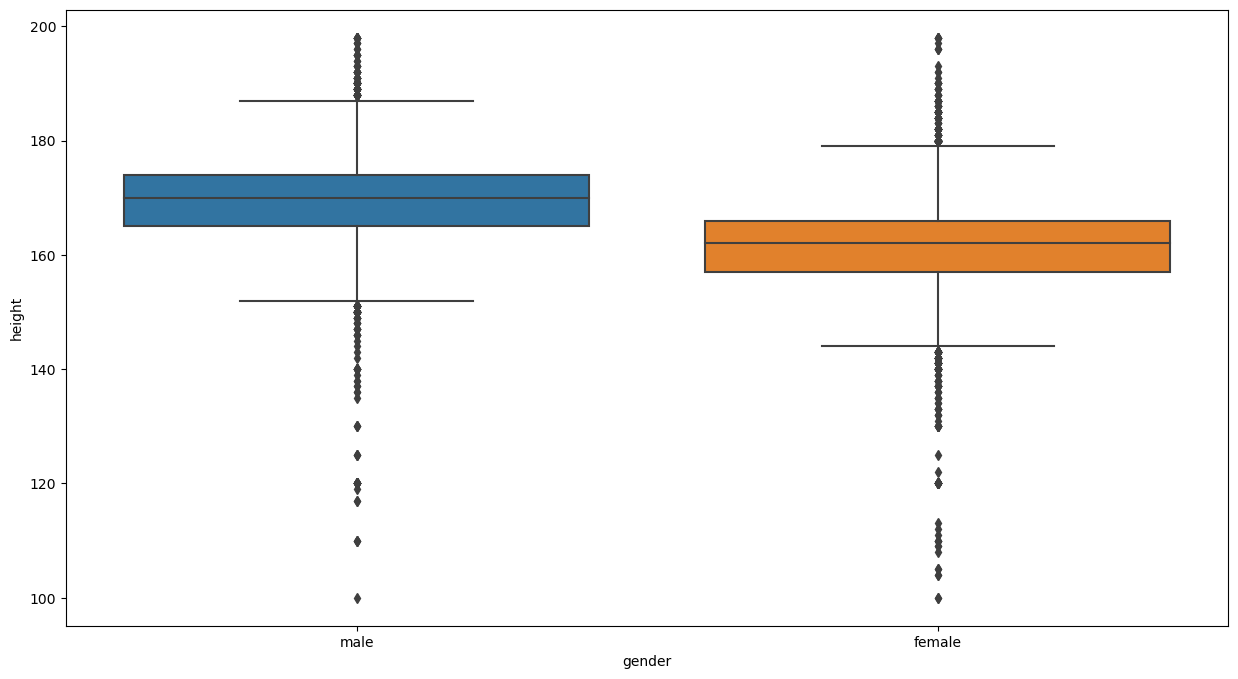

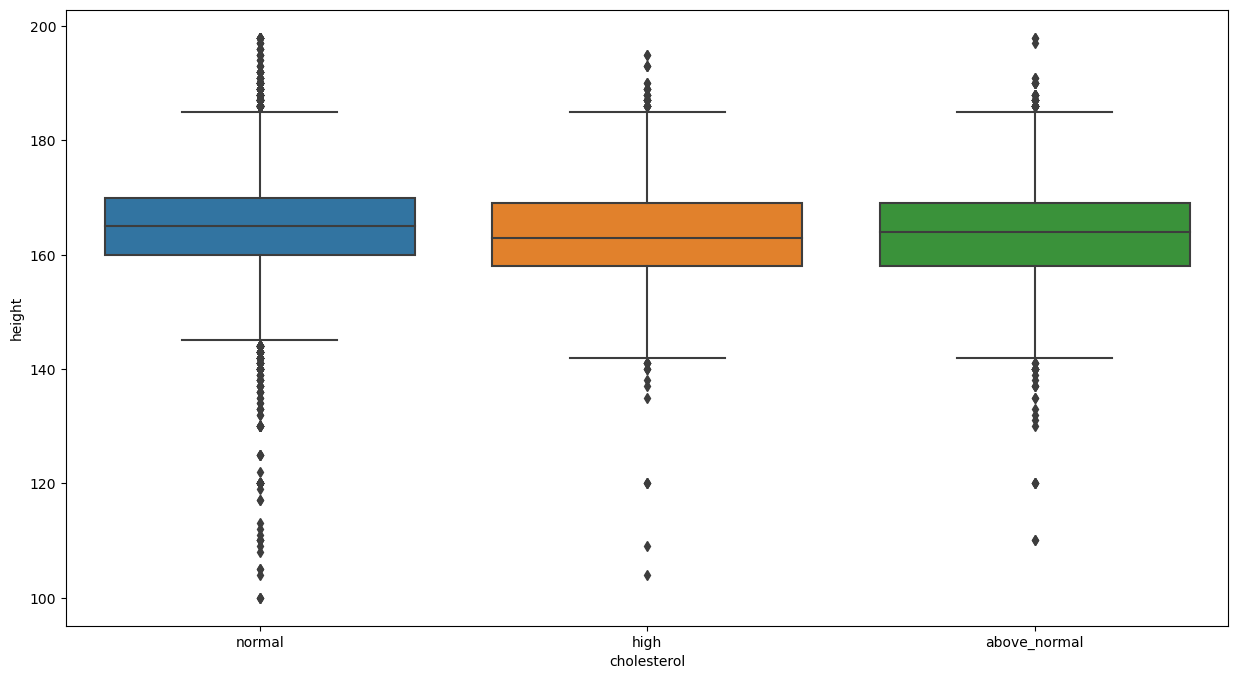

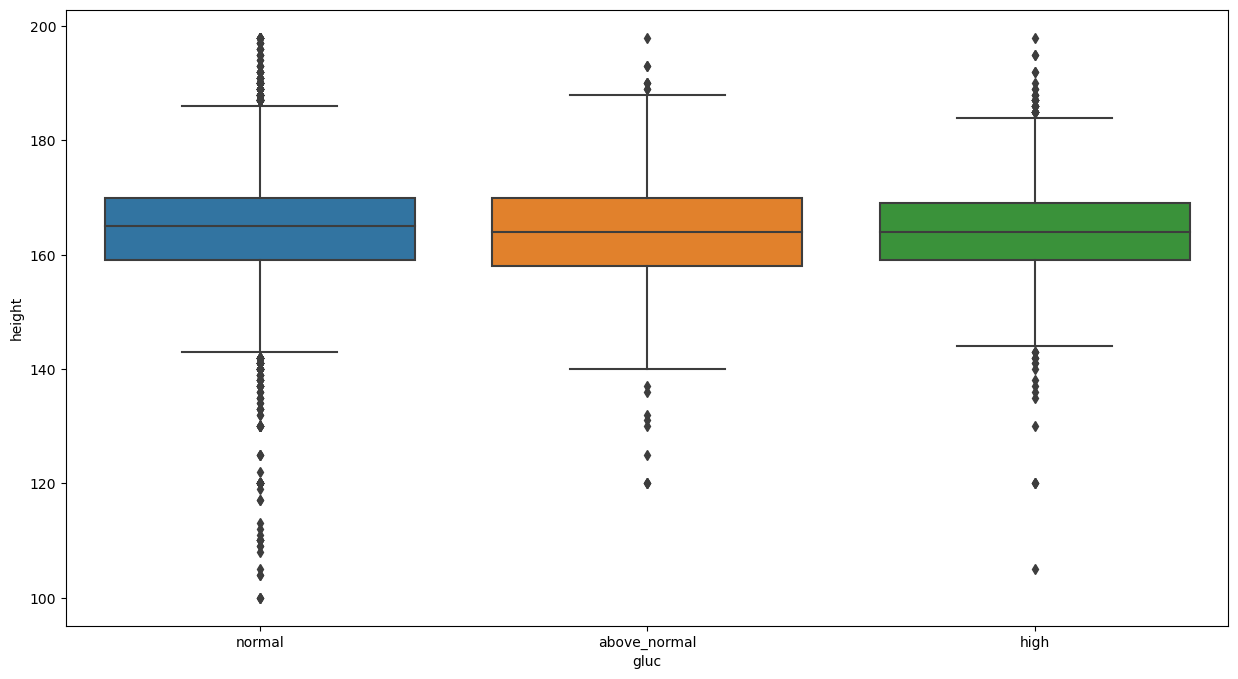

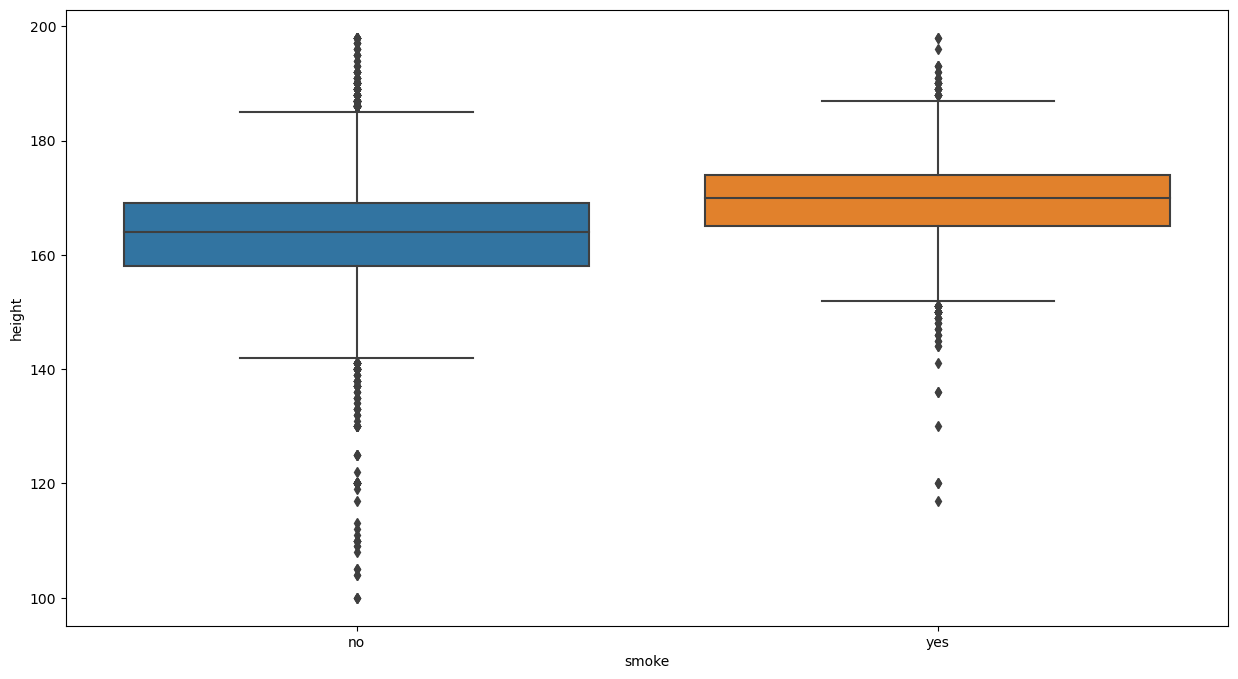

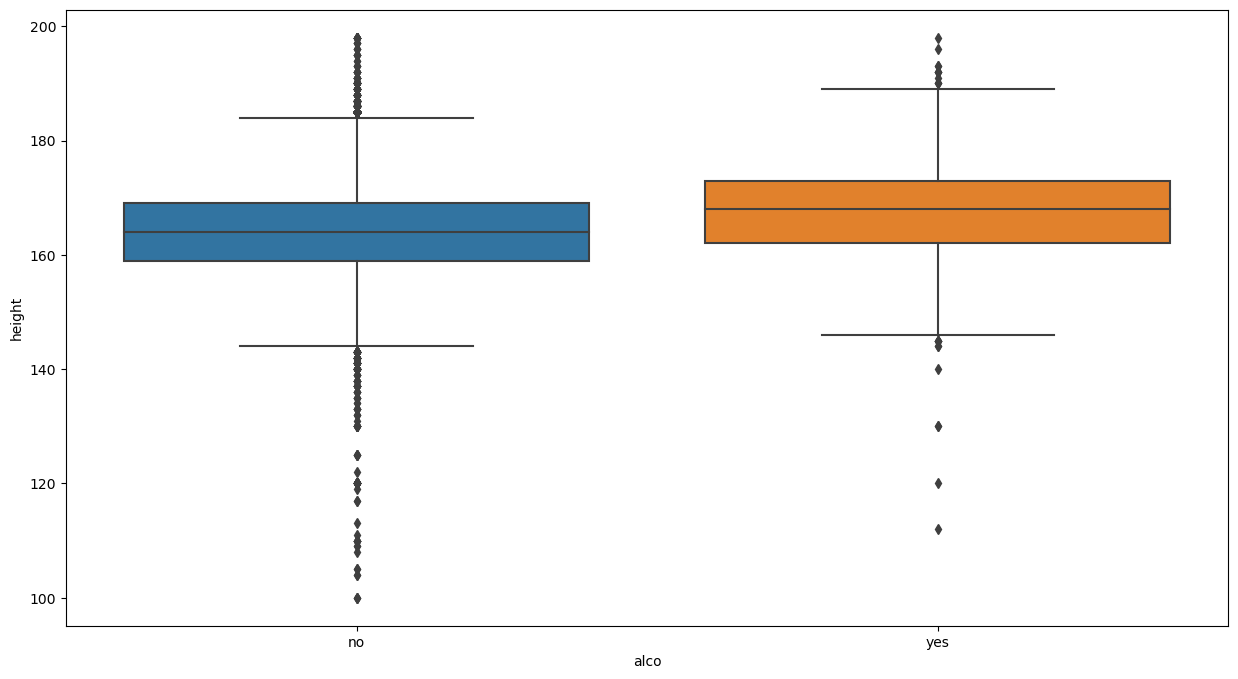

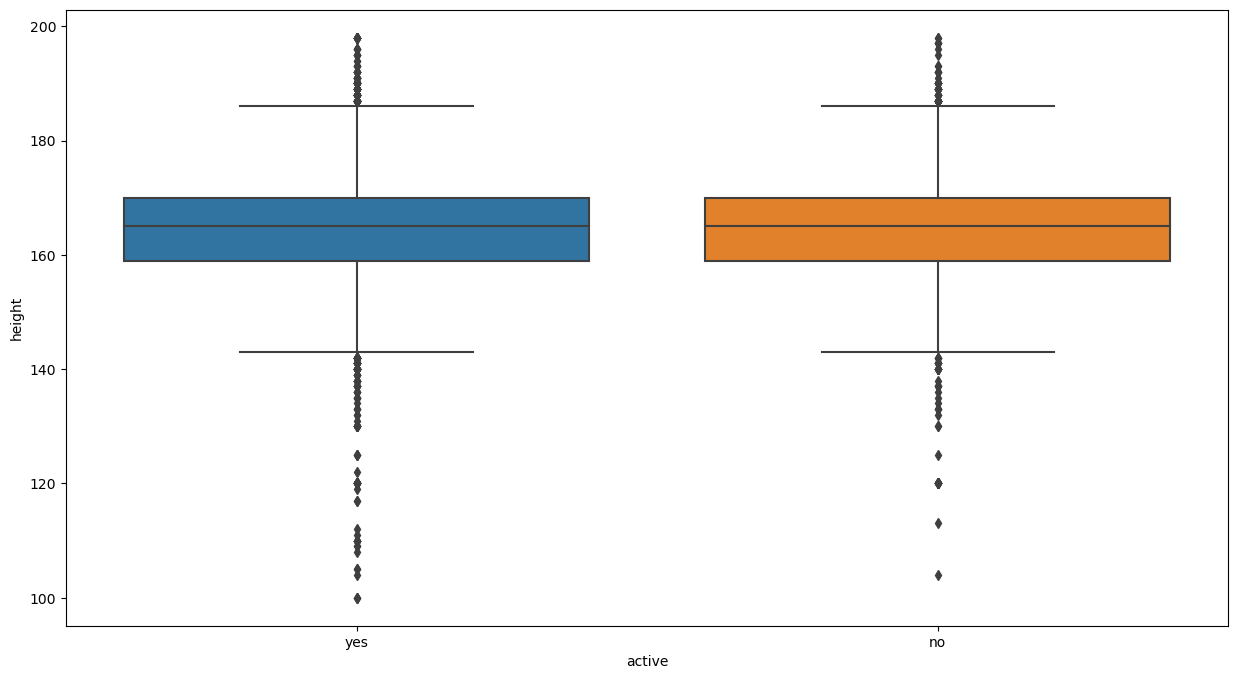

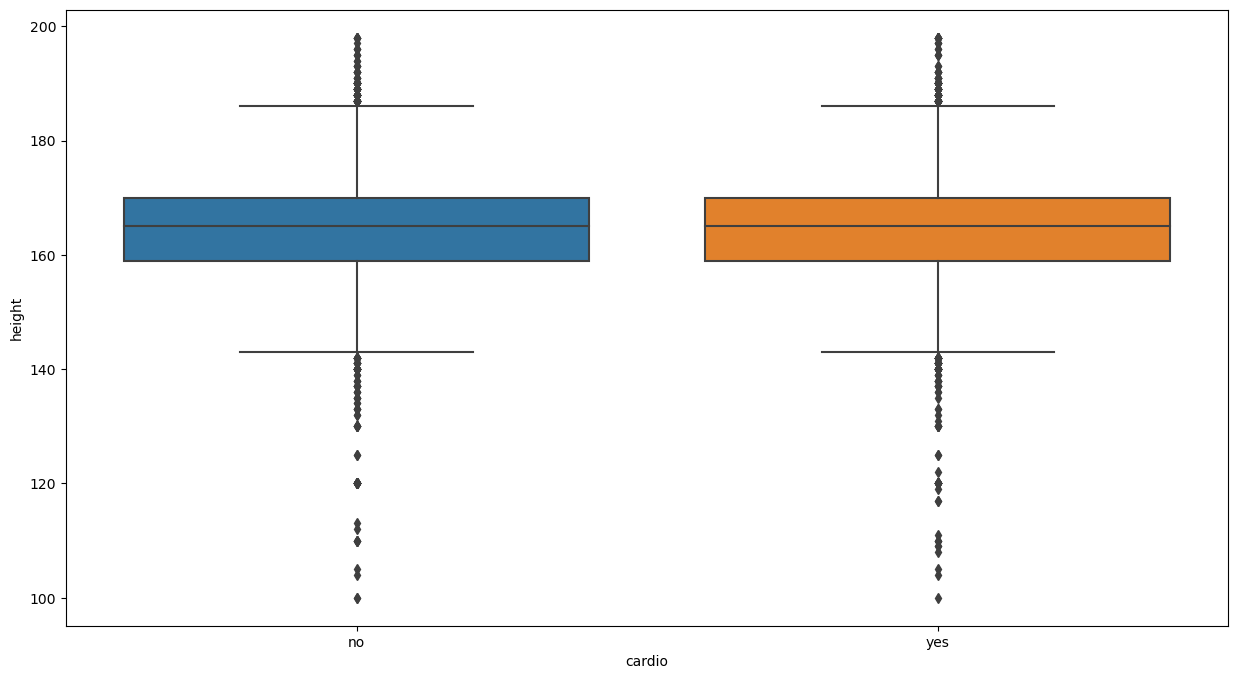

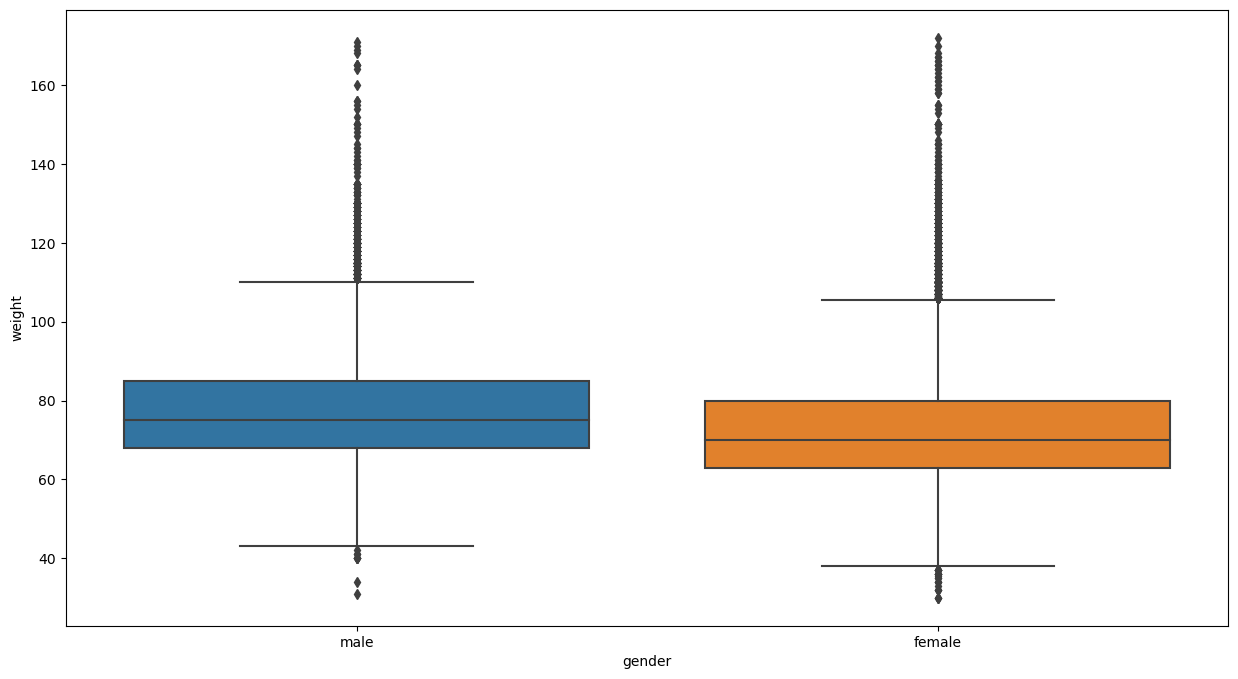

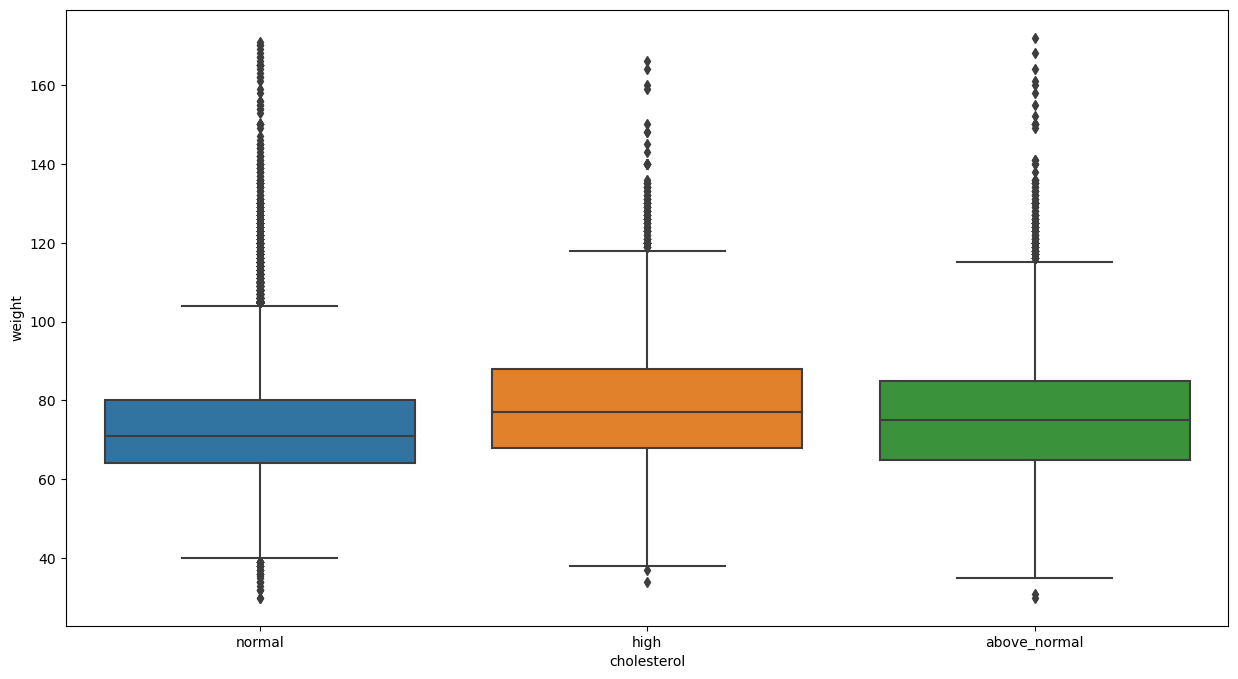

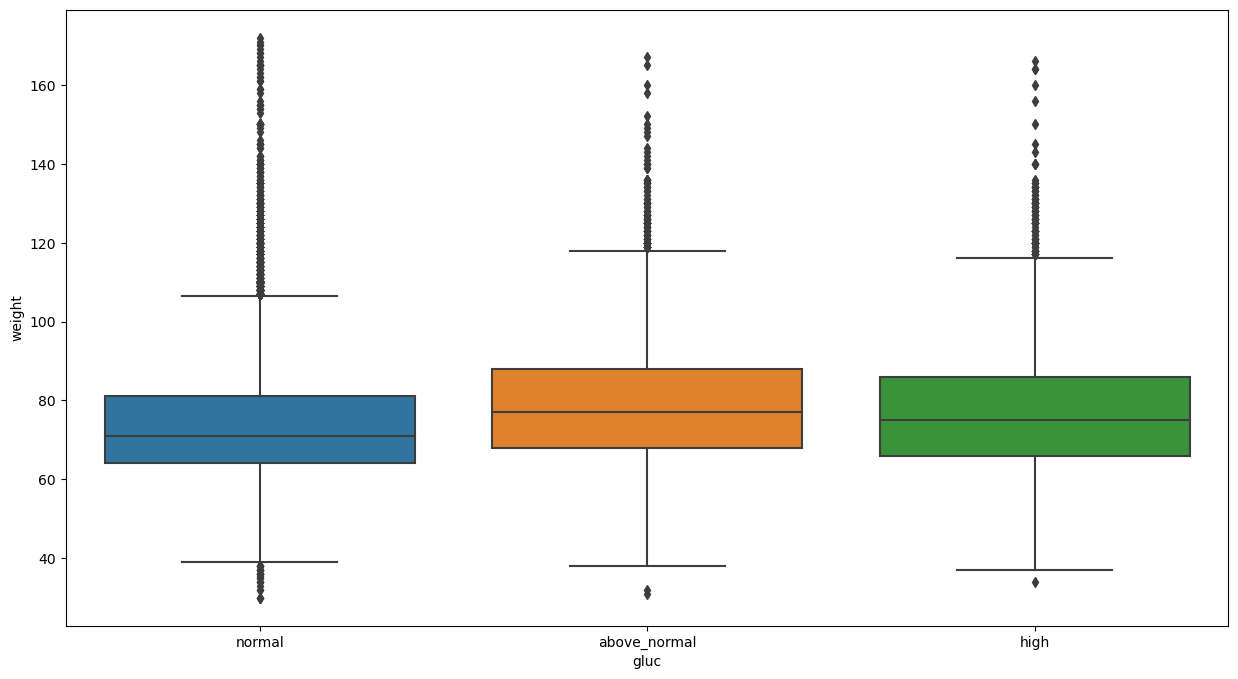

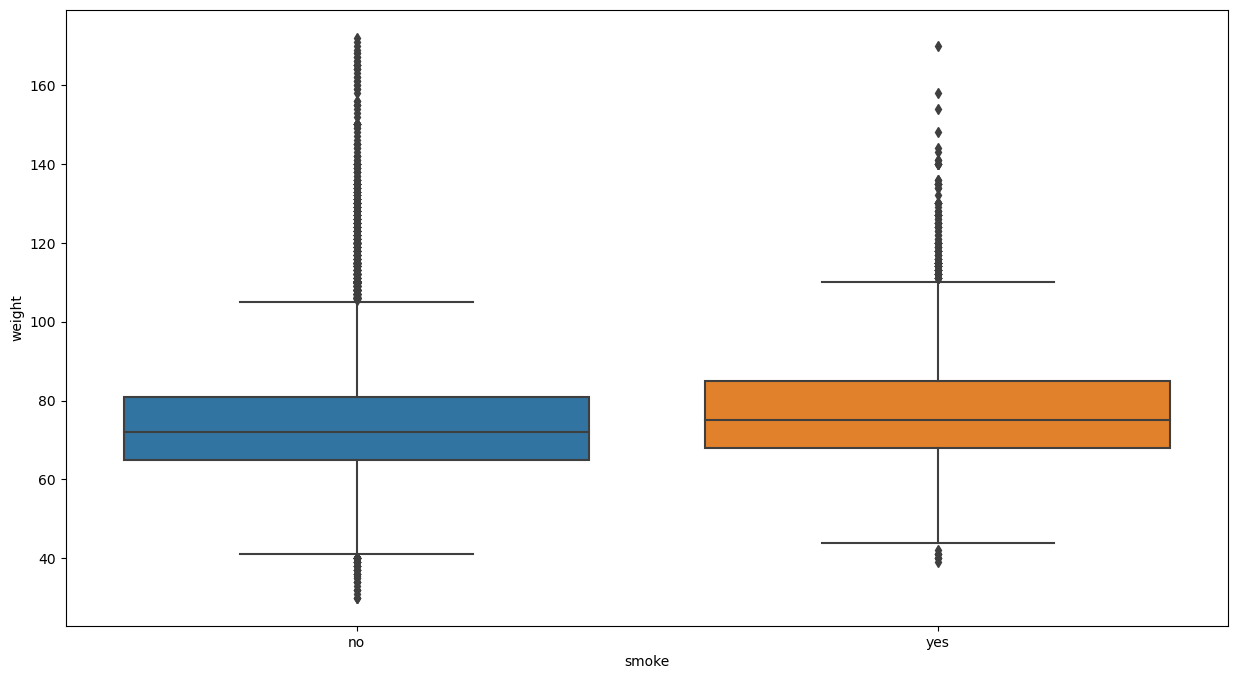

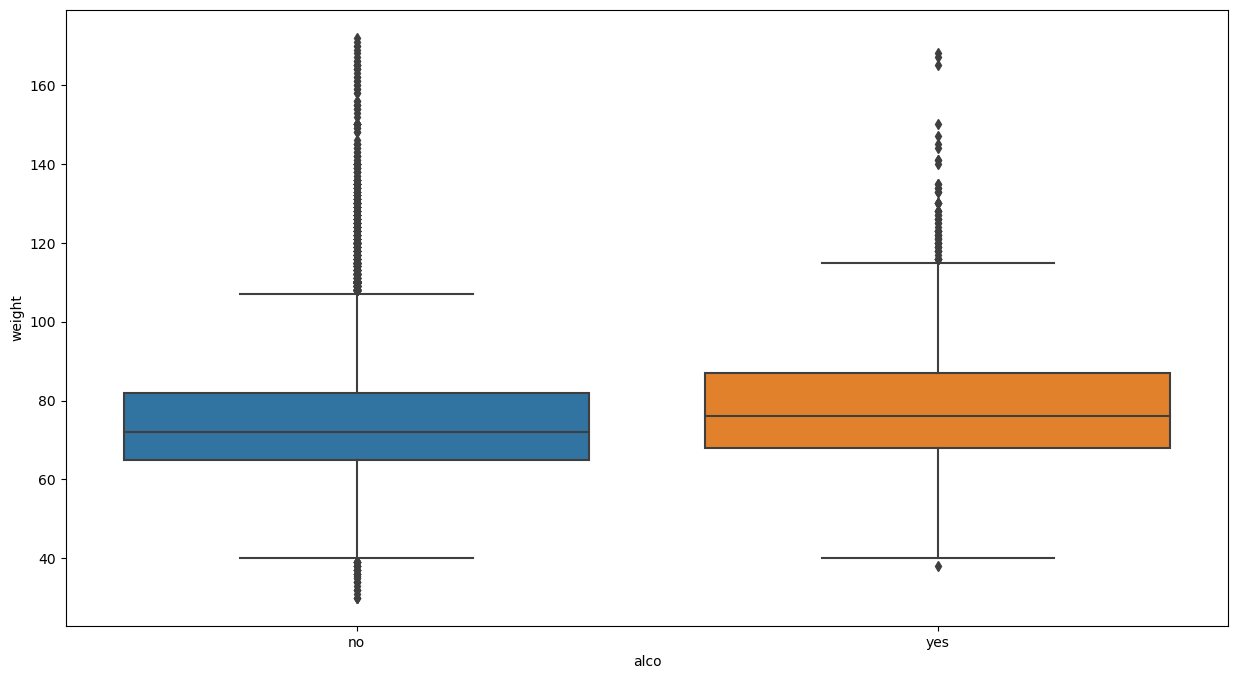

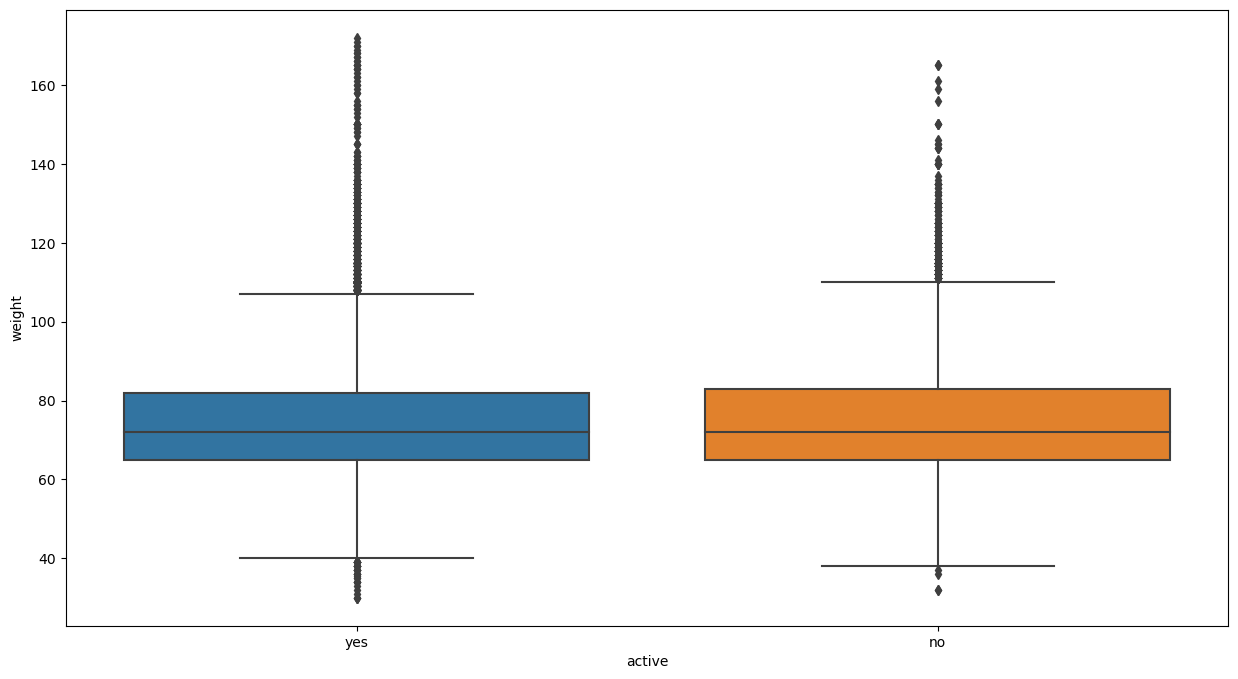

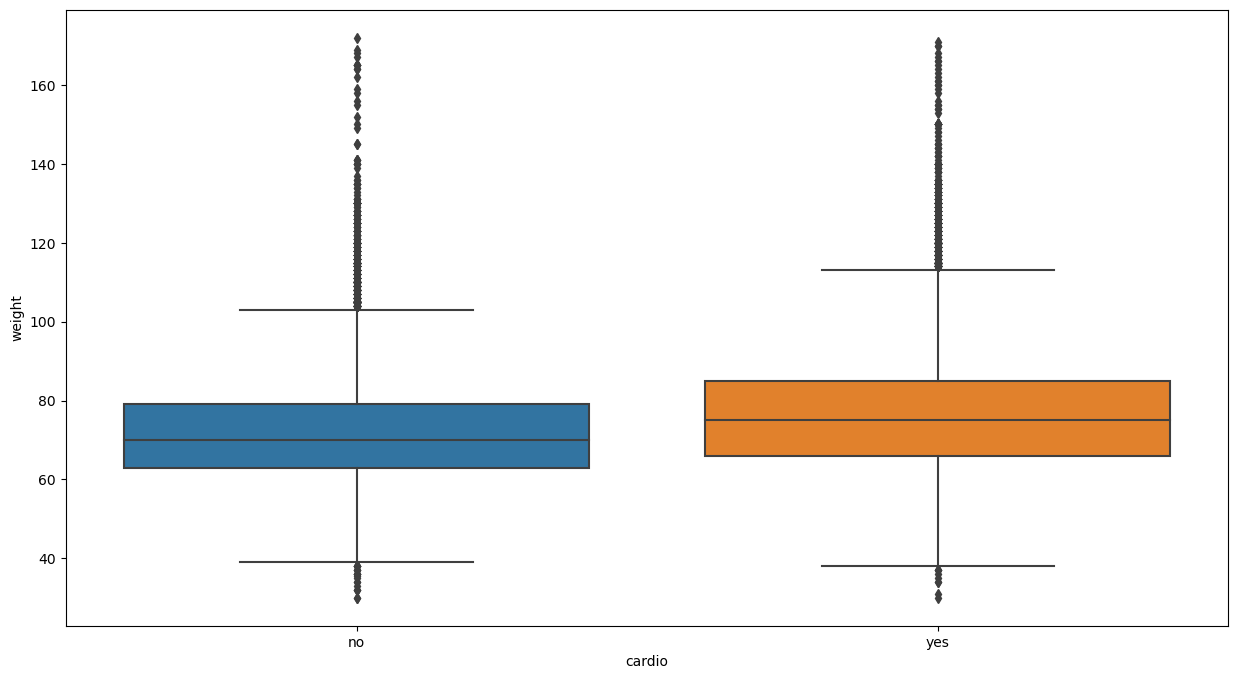

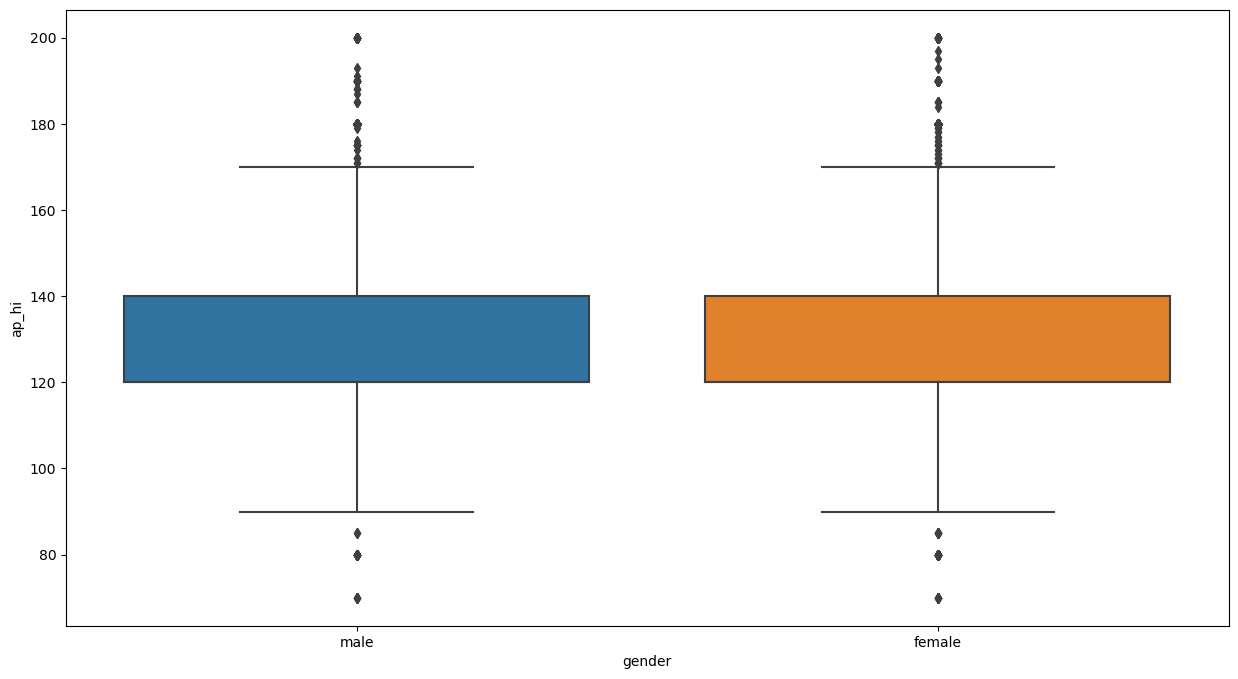

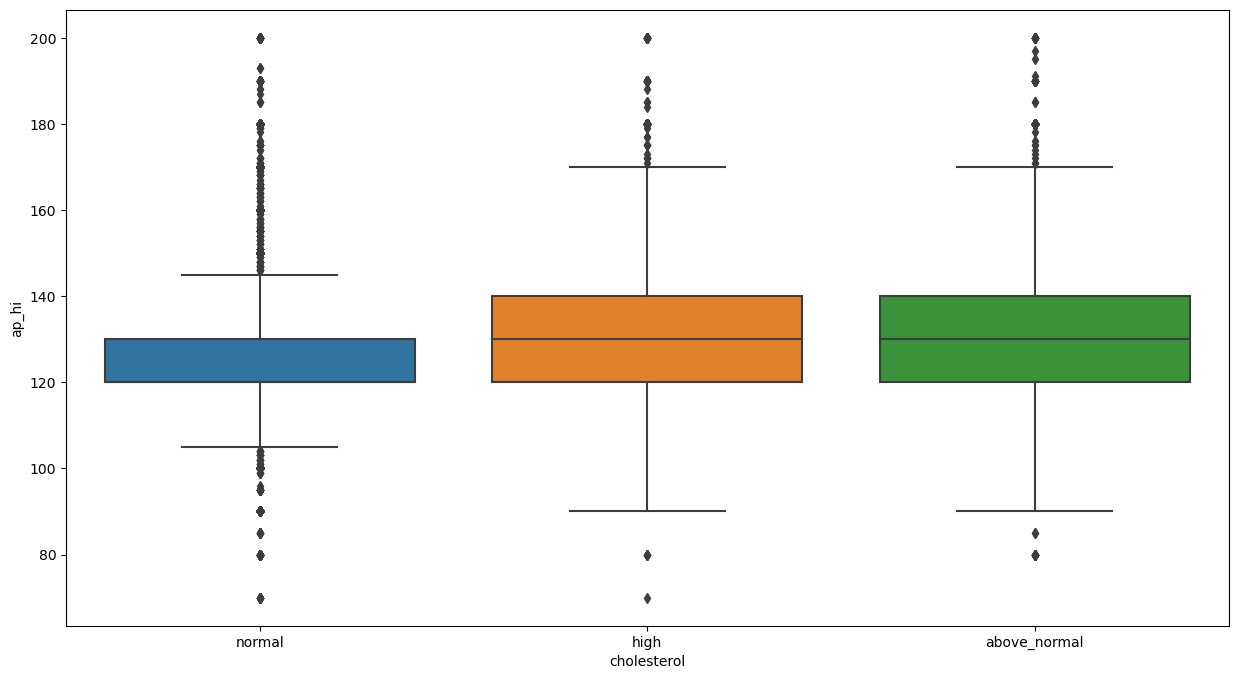

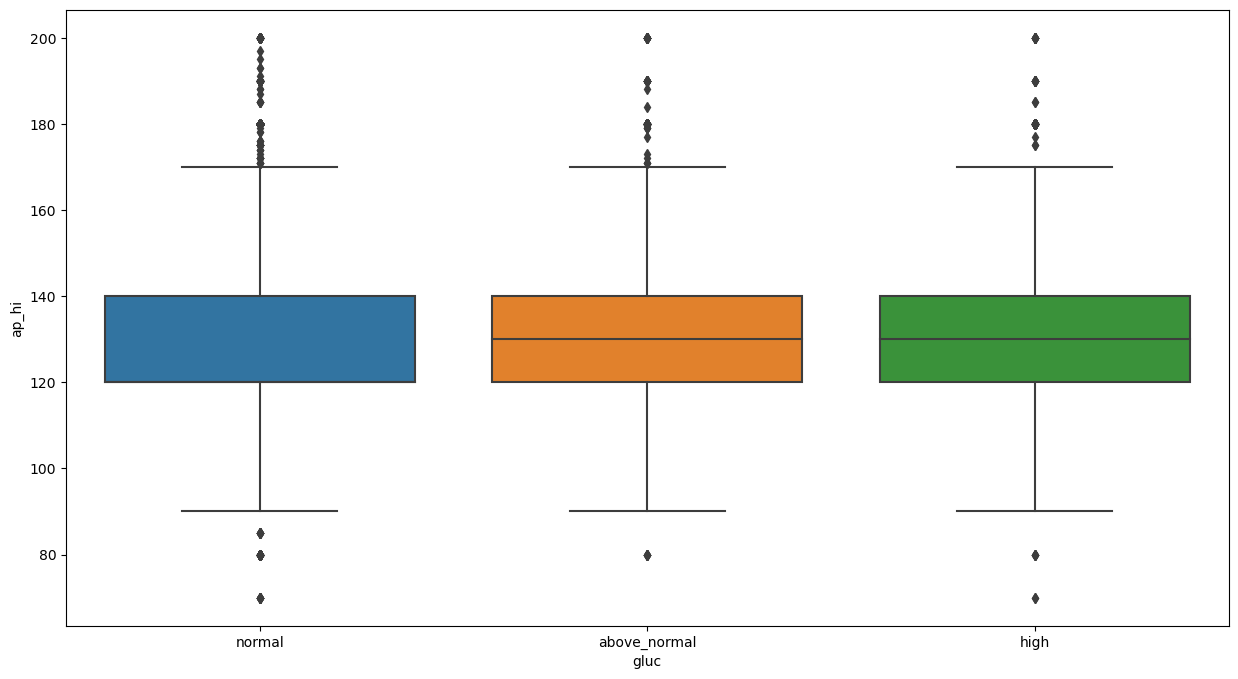

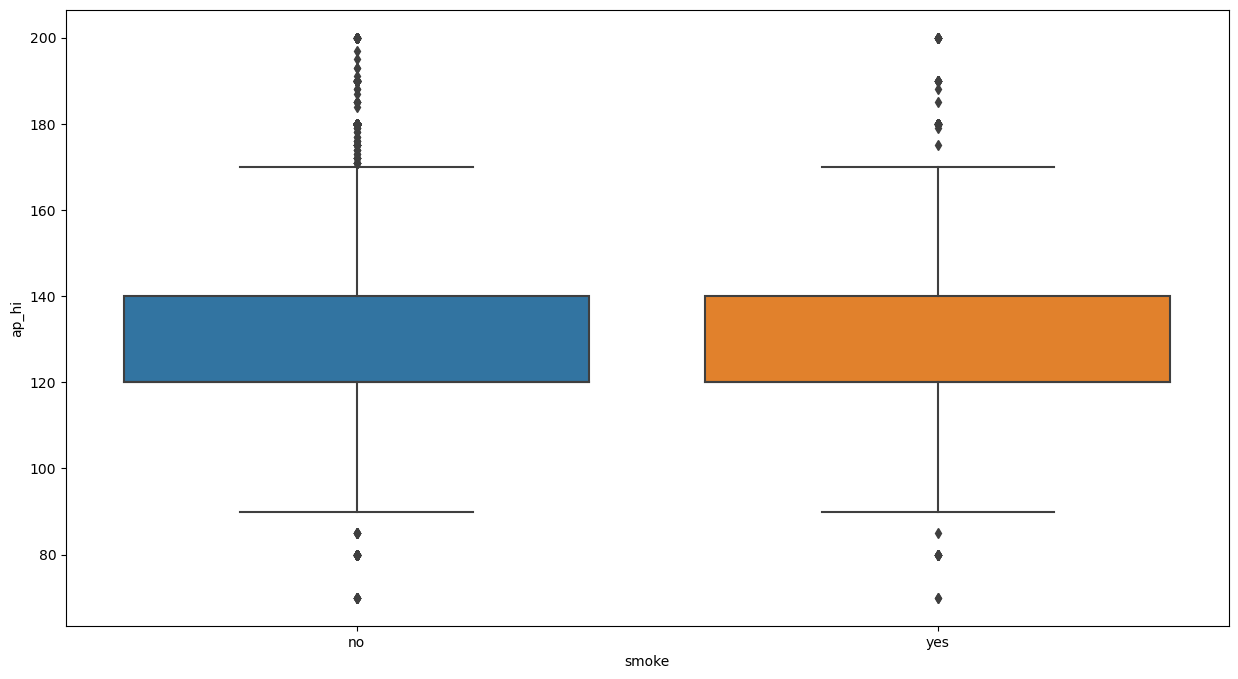

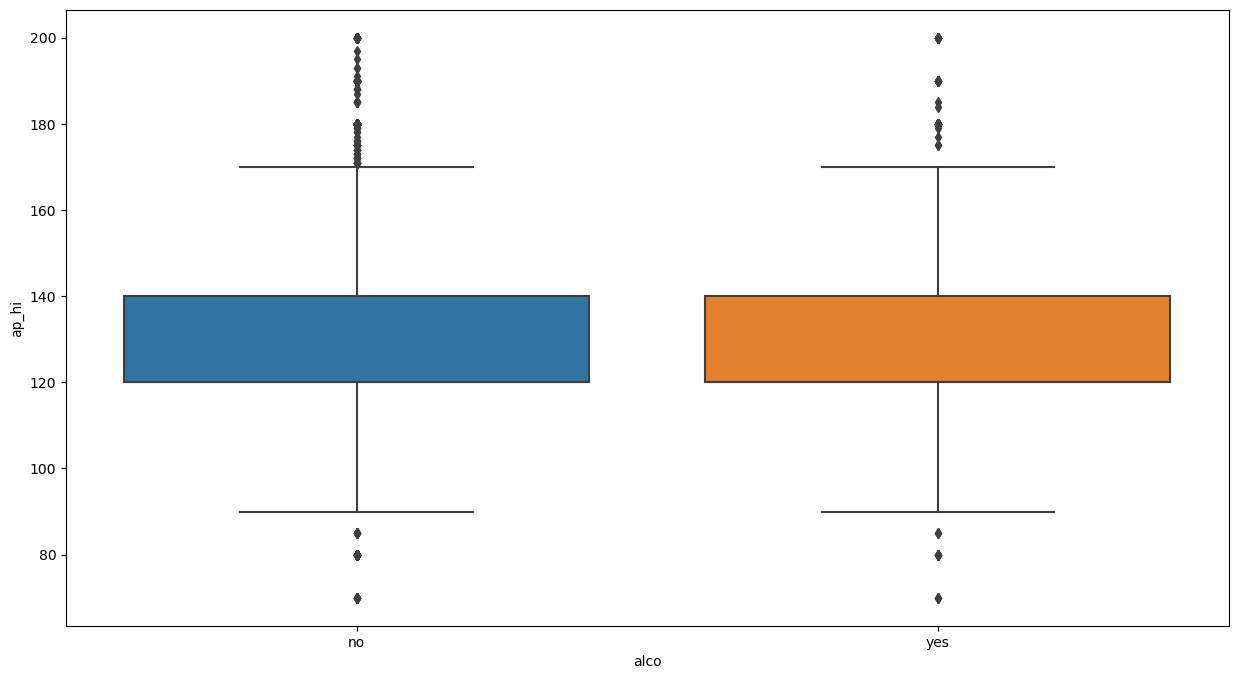

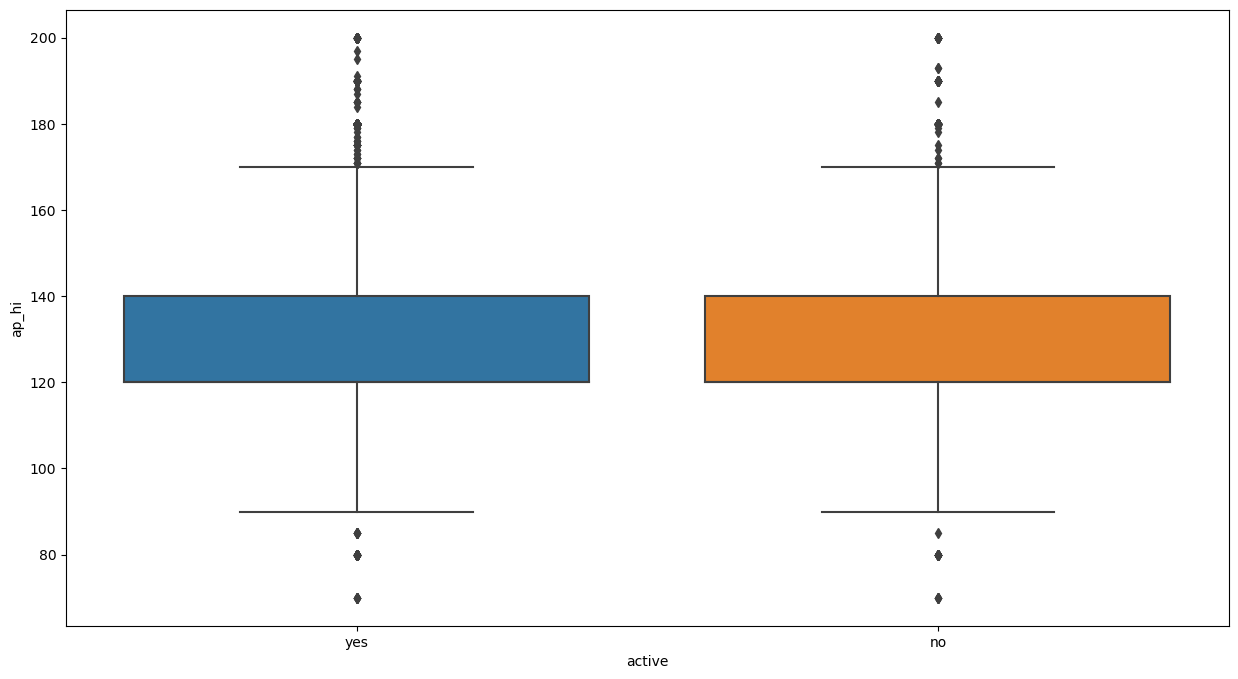

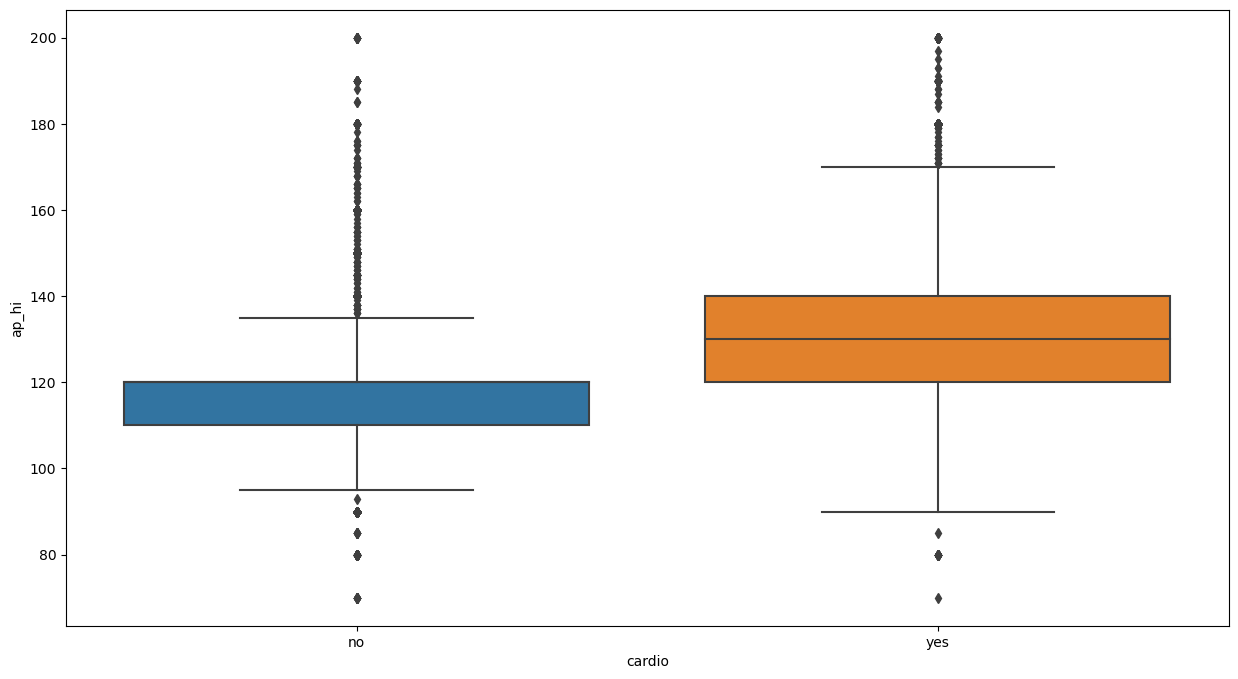

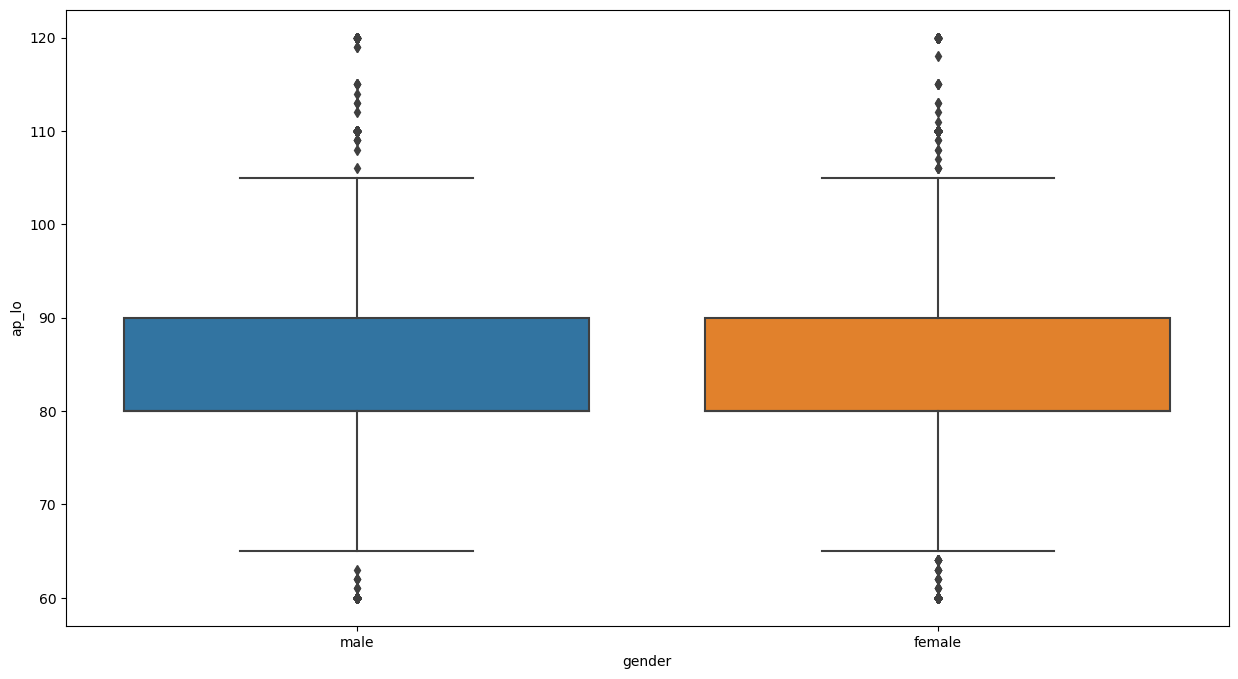

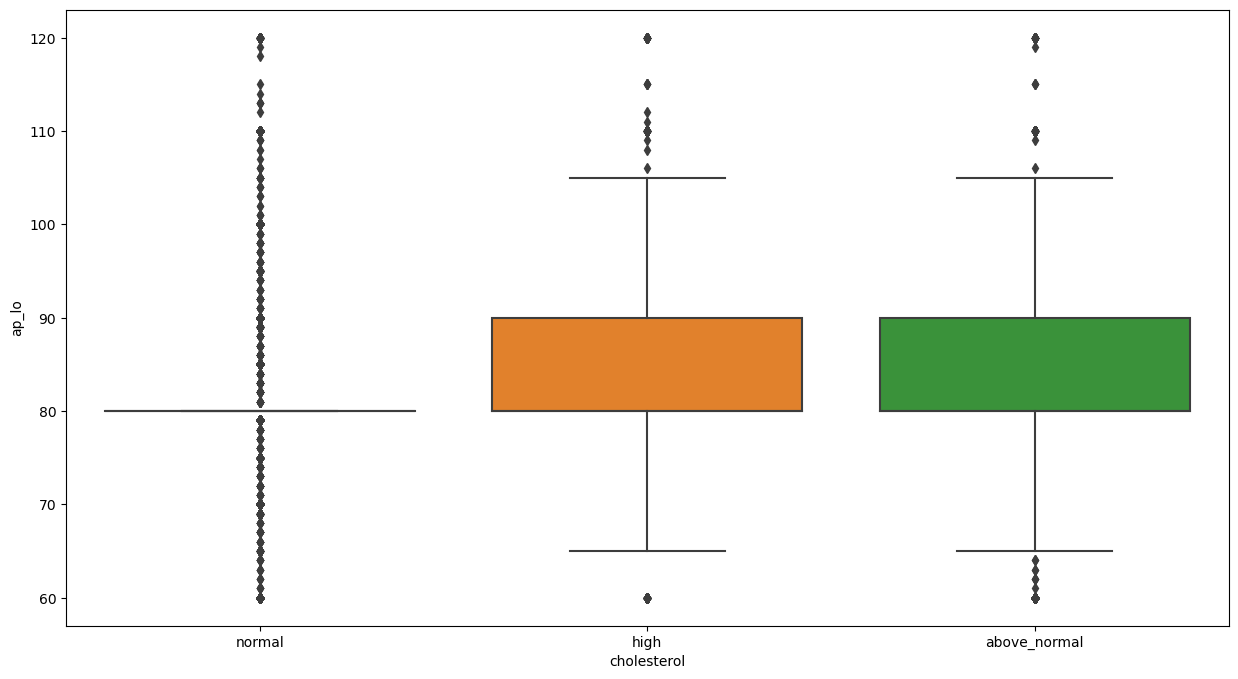

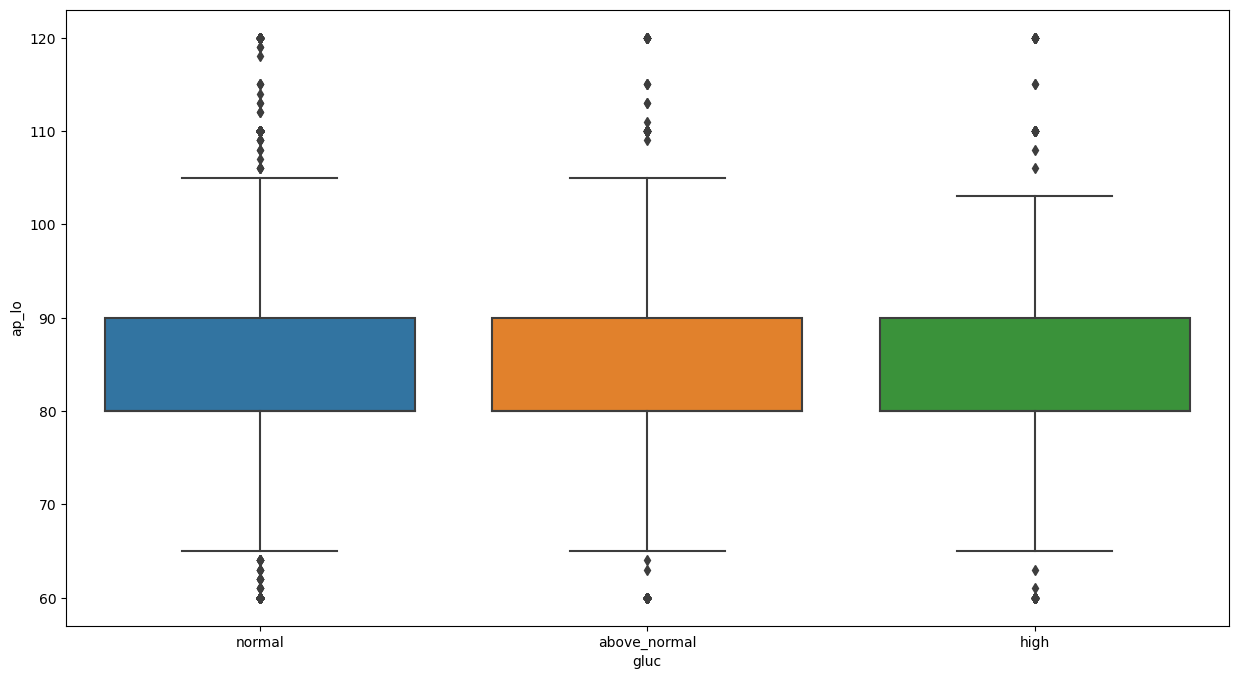

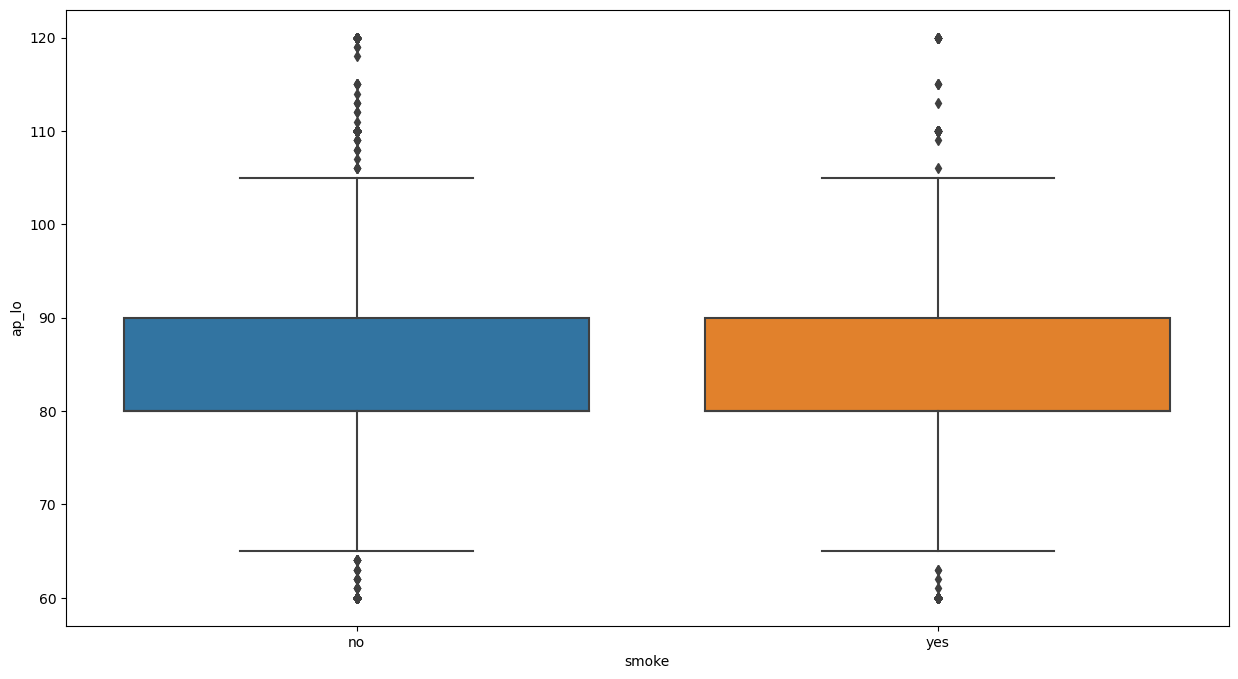

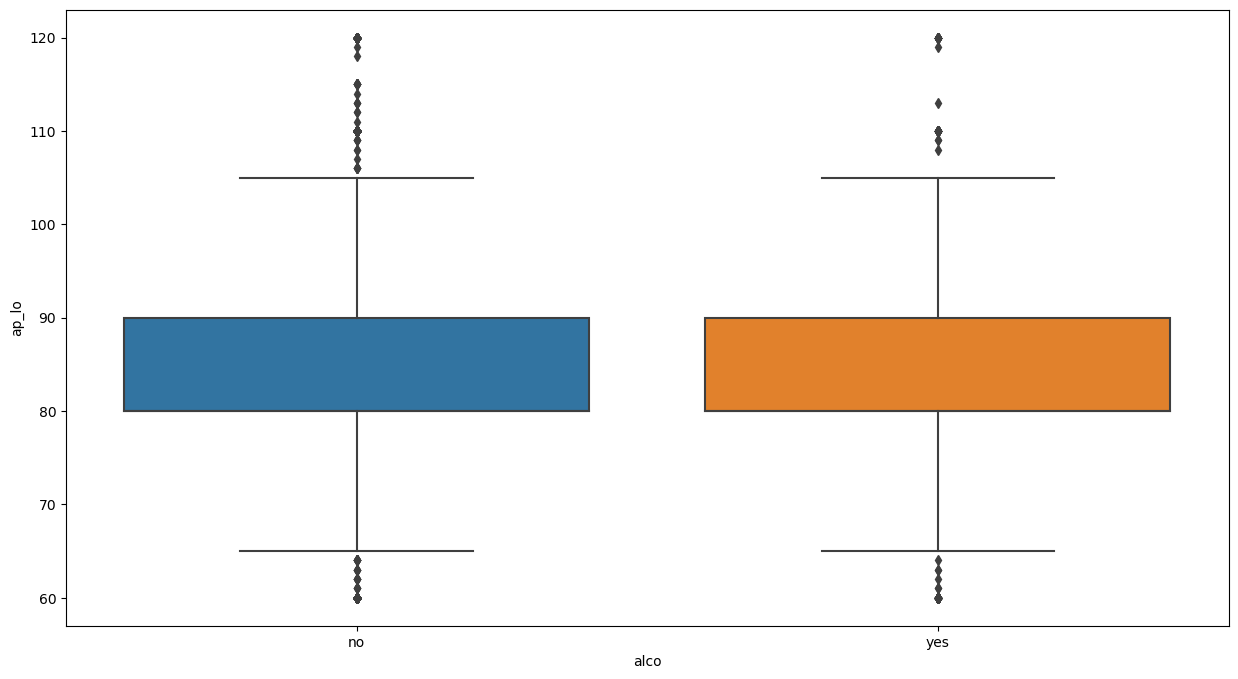

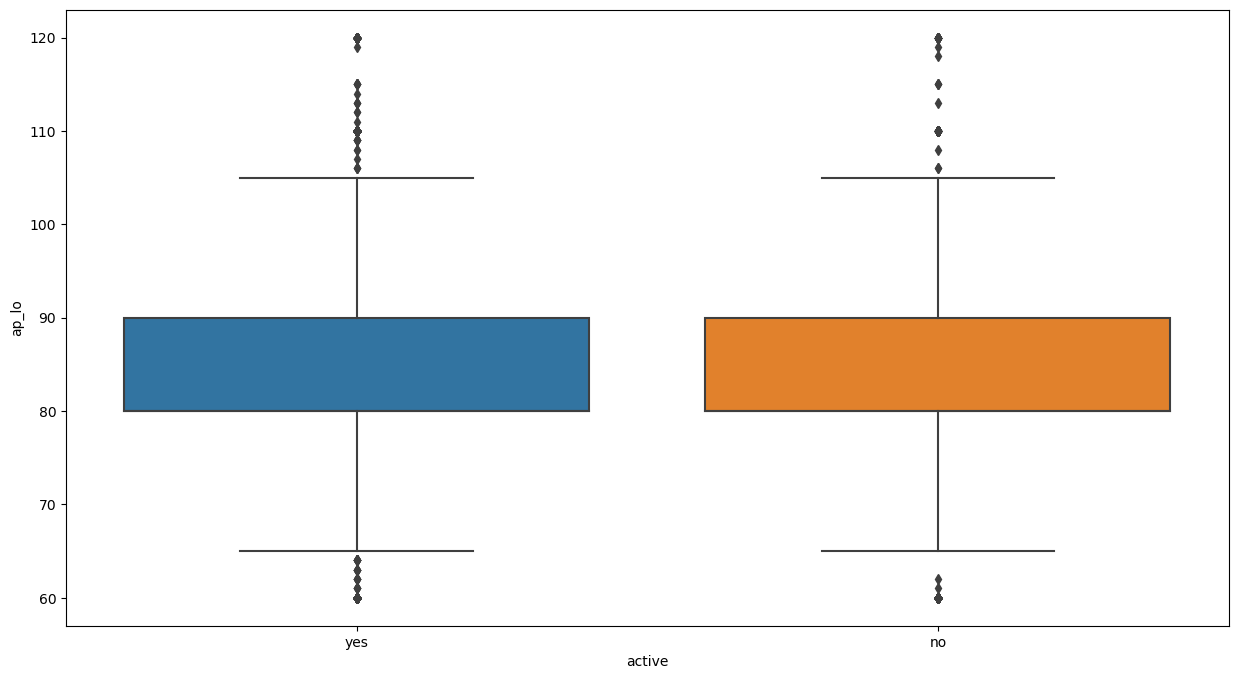

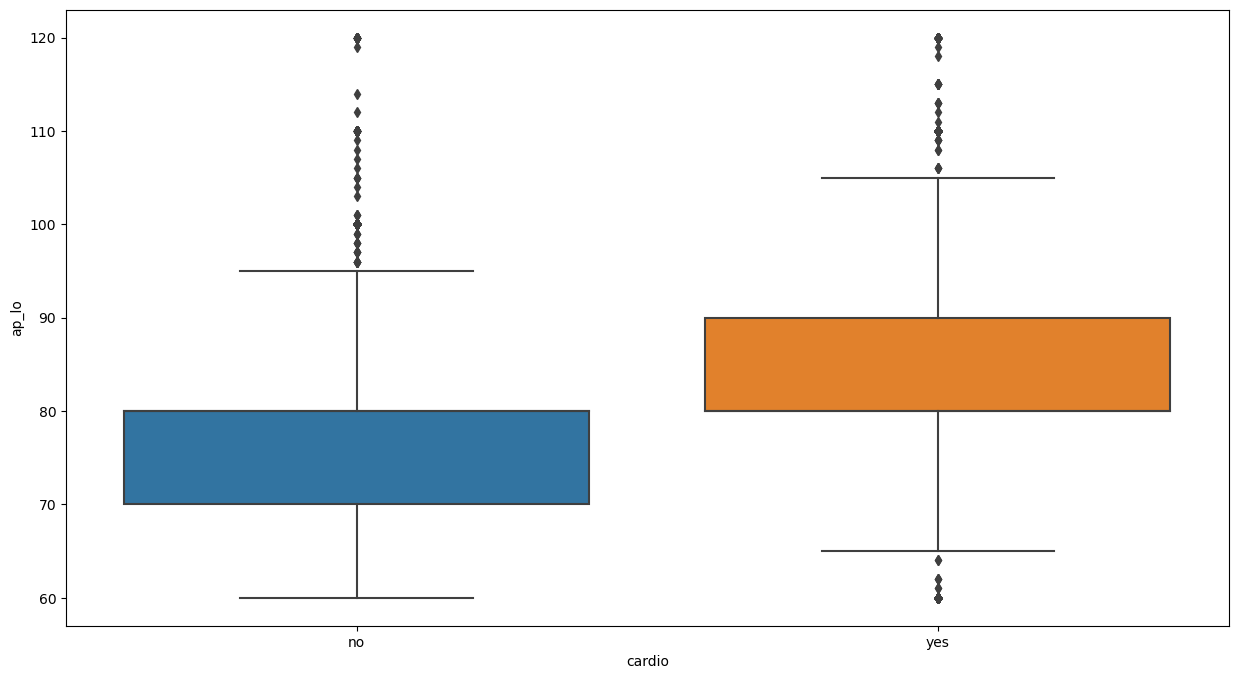

In [56]:
# Bivariate analysis for numeric vs categorical (num vs cat)(using boxplots)
for numeric_feature in nume:
    for categorical_feature in categorical_features:
        sns.boxplot(x=categorical_feature, y=numeric_feature, data=df)
        plt.show()

In [57]:
# Here in gender the  avg age of male and female is almost same i.e 45yrs
# In cholesterol the avg age above 57yrs are having high cholesterol
# The avg age above 55yrs are having high glucose levels
# The avg age who are into smoking is about 52yrs
# The avg age who are into alcohol is about 52yrs
# The avg age of active condition is about 54yrs
# The avg height of male is about 170cm where as for female, it is about 155cm
# age above 40 years have chance of cardio as yes


In [58]:
# male are having more avg weight about 75kgs where as female have about 70kgs
# High the avg weight high the cholesterol is i.e slot with having more than 75kgs as avg weight
# weight in gluocose is not relevant as per shown plot
# People with high alcohol consumption have high avg weight

In [59]:
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

#### Multivariate Analysis

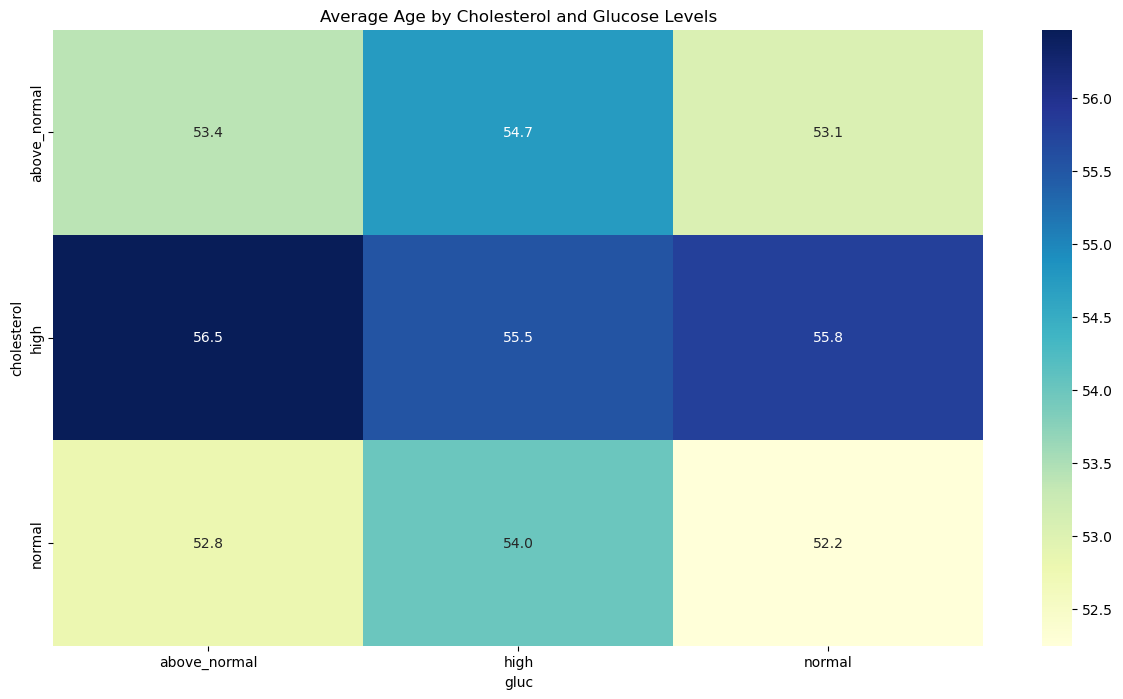

In [60]:
# Create a heatmap to visualize the relationship
pivot_table = df.pivot_table(values='age', index='cholesterol', columns='gluc', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Age by Cholesterol and Glucose Levels')
plt.show()

In [61]:
# Inference:-

# We can see person with age about 56yrs are having high cholesterol and high glucose

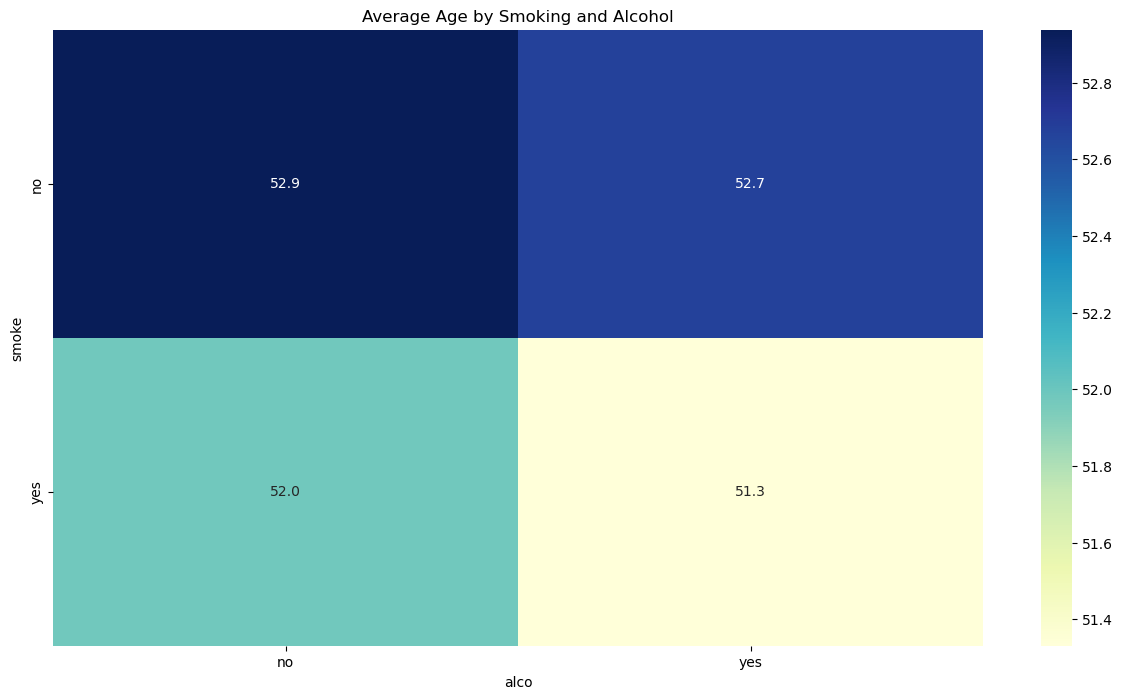

In [62]:
pivot_table = df.pivot_table(values='age', index='smoke', columns='alco', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Age by Smoking and Alcohol')
plt.show()

In [63]:
# Inference:-

# People with mean age under 52yrs generally take alcohol and do smoke
# People with mean age under 52.5yrs generally do not take alcohol but do smoke
# People with mean age under 53.4yrs generally do not take alcohol and do not do smoke

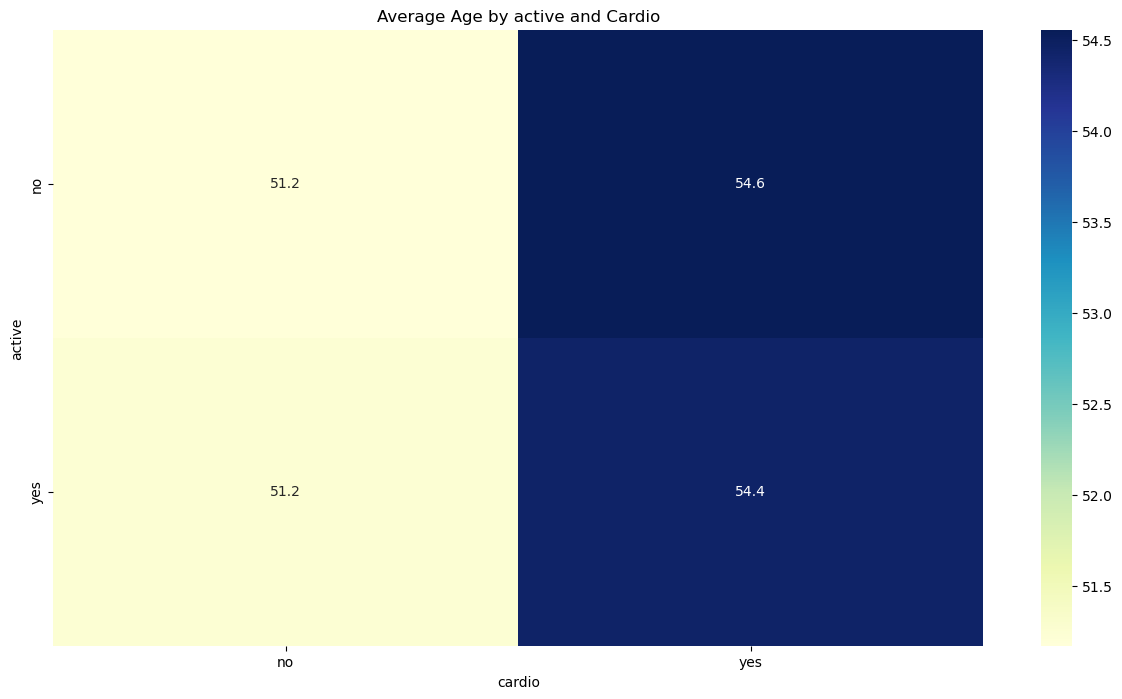

In [64]:
pivot_table = df.pivot_table(values='age', index='active', columns='cardio', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Age by active and Cardio')
plt.show()


In [65]:
# Inference:-

# Here we see the mean age with 54.4 are having cardio and with active physical status
# Here we see the mean age with 54.6 are having cardio and with no active physical status
# Here we see the mean age with 51.2 are having no cardio and with active physical status

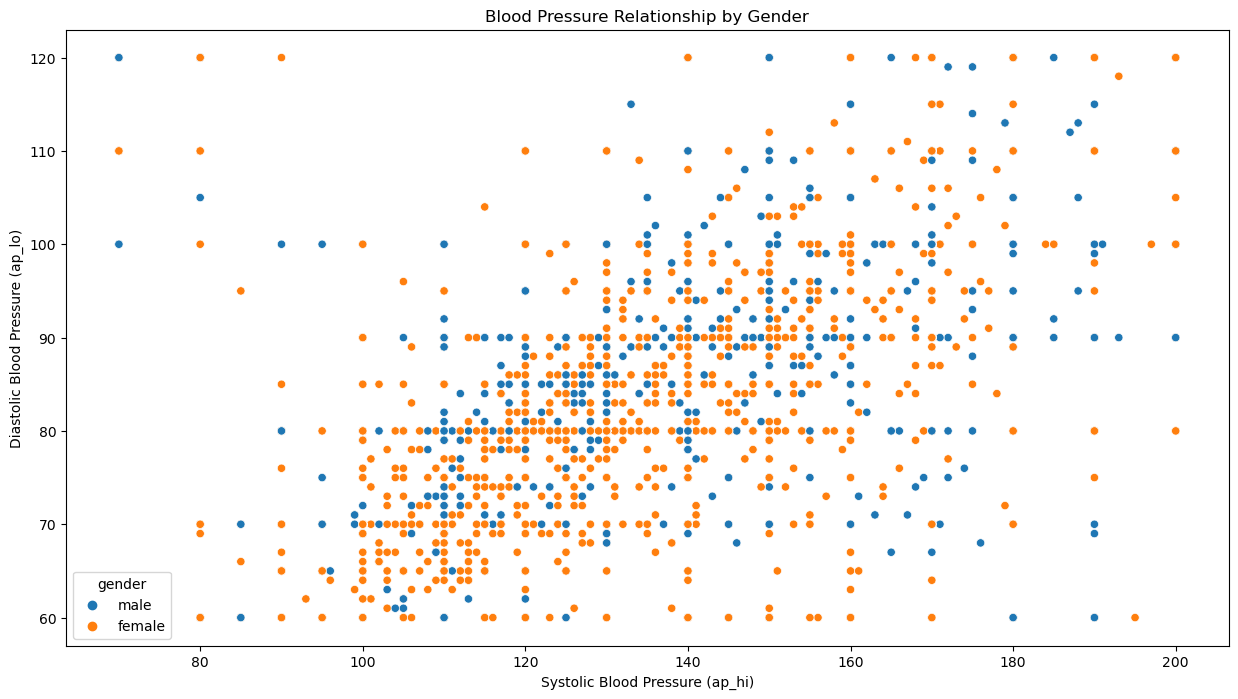

In [66]:

# Create scatter plots

sns.scatterplot(data=df, x='ap_hi', y='ap_lo', hue='gender')
plt.title('Blood Pressure Relationship by Gender')
plt.xlabel('Systolic Blood Pressure (ap_hi)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.show()


In [67]:
# Inference:-

# From this we can see most males with high Diastolic Blood Pressure not much Systolic Blood Pressure 
# From this we can see most Females with high Systolic Blood Pressure not much Diastolic Blood Pressure

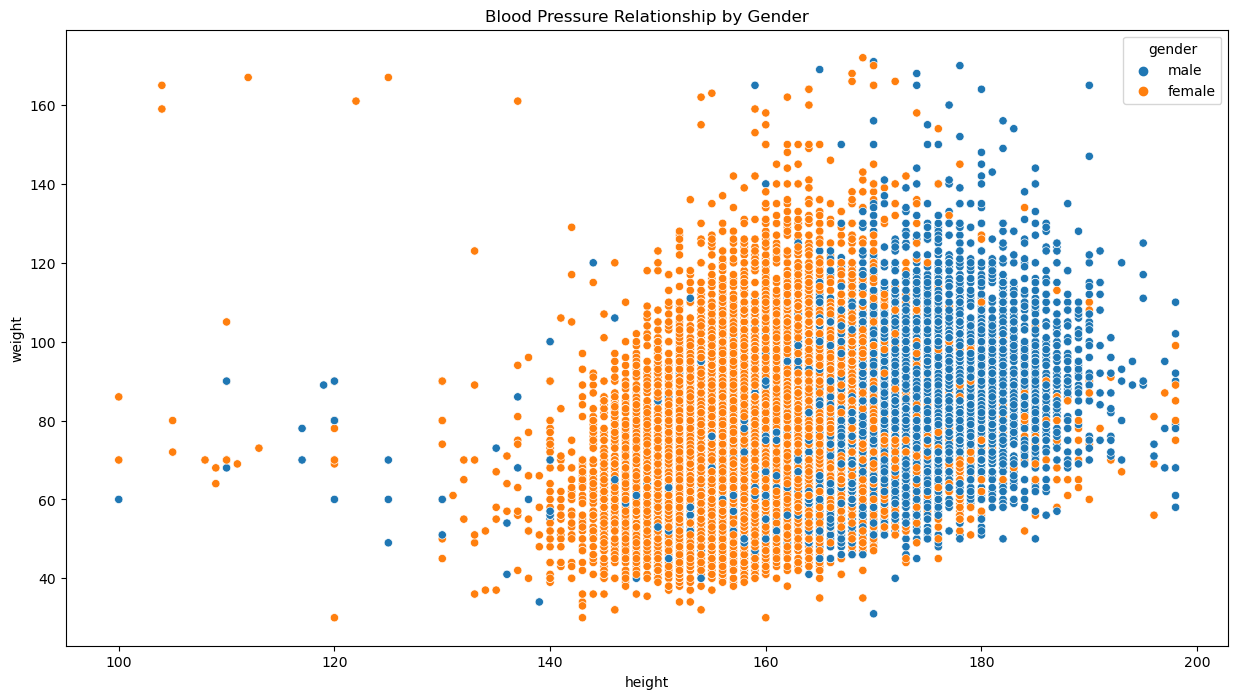

In [68]:

# Create scatter plots

sns.scatterplot(data=df, x='height', y='weight', hue='gender')
plt.title('Blood Pressure Relationship by Gender')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()


In [69]:
#height of male is higher then female, weight is varying irrespective of gender

#### Applying Feature Engineering

Calculating the BMI using Height and Weight. BMI=W/(H**2)

In [70]:
df['BMI'] = df['weight']/((df['height']/100)**2)

In [71]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,male,168.0,62.0,110.0,80.0,normal,normal,no,no,yes,no,21.967120
1,55,female,156.0,85.0,140.0,90.0,high,normal,no,no,yes,yes,34.927679
2,51,female,165.0,64.0,130.0,70.0,high,normal,no,no,no,yes,23.507805
3,48,male,169.0,82.0,150.0,100.0,normal,normal,no,no,yes,yes,28.710479
4,47,female,156.0,56.0,100.0,60.0,normal,normal,no,no,no,no,23.011177


Calculating Mean Arterial Pressure (MAP) =( 2* Diastolic Blood Pressure + Systolic Blood Pressure) / 3

ap_hi:Systolic Blood Pressure ap_lo:Diastolic Blood Pressure

In [72]:
df['MAP'] = ((2* df['ap_lo']) + (df['ap_hi']))/3

In [73]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,50,male,168.0,62.0,110.0,80.0,normal,normal,no,no,yes,no,21.967120,90.000000
1,55,female,156.0,85.0,140.0,90.0,high,normal,no,no,yes,yes,34.927679,106.666667
2,51,female,165.0,64.0,130.0,70.0,high,normal,no,no,no,yes,23.507805,90.000000
3,48,male,169.0,82.0,150.0,100.0,normal,normal,no,no,yes,yes,28.710479,116.666667
4,47,female,156.0,56.0,100.0,60.0,normal,normal,no,no,no,no,23.011177,73.333333


In [74]:
df1=df.copy()

dropping height,weight,ap_lo,ap_hi  from df1 as we have done feature engineering with these features

In [75]:
df1.drop(["height","weight","ap_hi","ap_lo"],axis=1,inplace=True)
df1.shape

(68453, 10)

In [76]:
df1.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,50,male,normal,normal,no,no,yes,no,21.967120,90.000000
1,55,female,high,normal,no,no,yes,yes,34.927679,106.666667
2,51,female,high,normal,no,no,no,yes,23.507805,90.000000
3,48,male,normal,normal,no,no,yes,yes,28.710479,116.666667
4,47,female,normal,normal,no,no,no,no,23.011177,73.333333


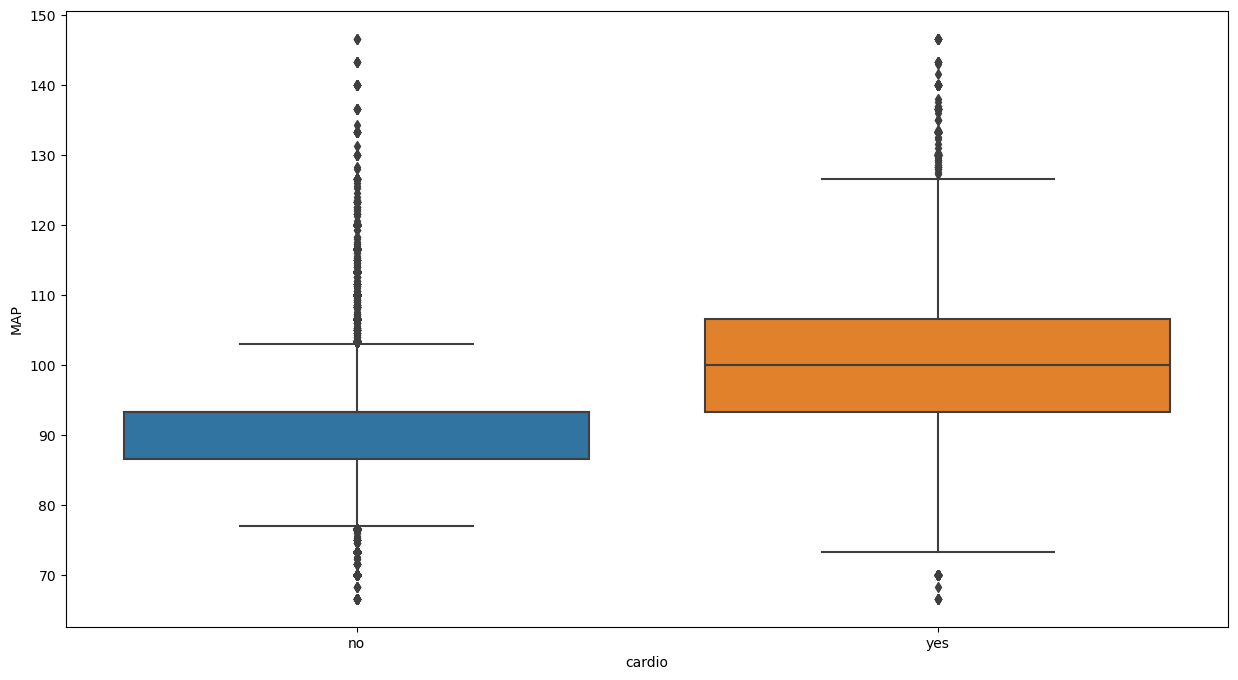

In [77]:
sns.boxplot(x=df1['cardio'],y=df1['MAP'])
plt.show()

<AxesSubplot:xlabel='BMI', ylabel='MAP'>

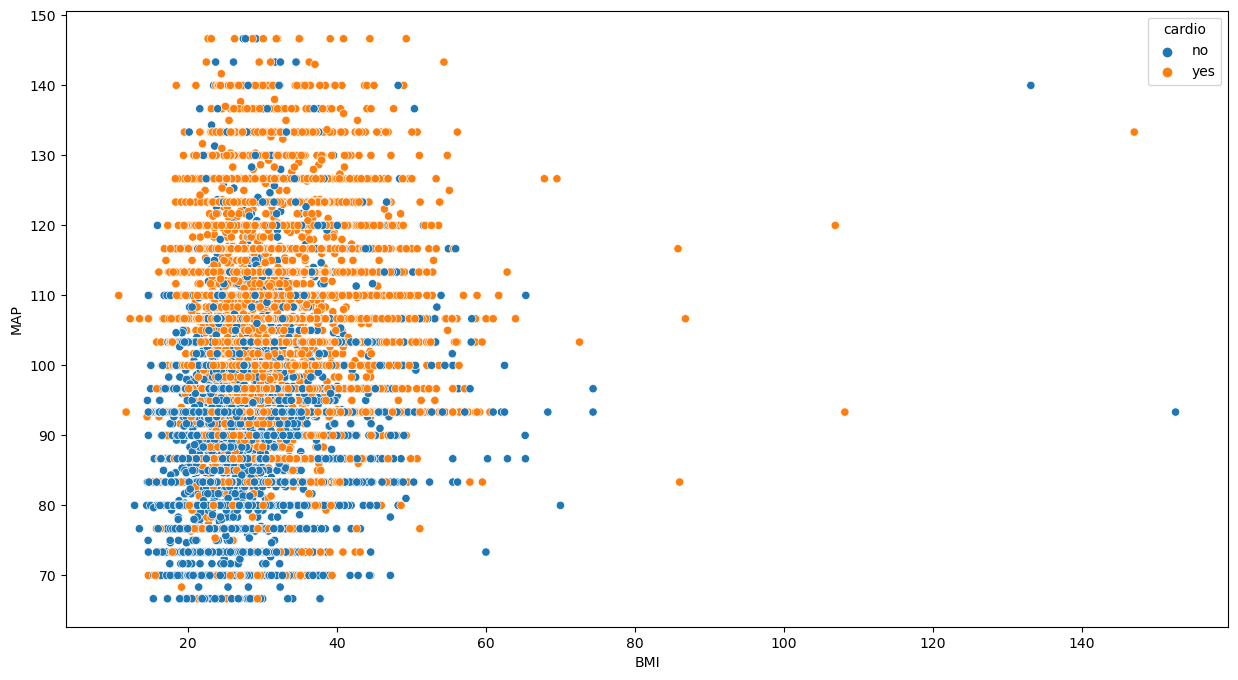

In [78]:
sns.scatterplot(x=df1['BMI'],y=df1['MAP'],hue=df1['cardio'])

In [79]:
# AS MAP and BMI increases there are more chnaces of cardio attack

<AxesSubplot:xlabel='MAP', ylabel='age'>

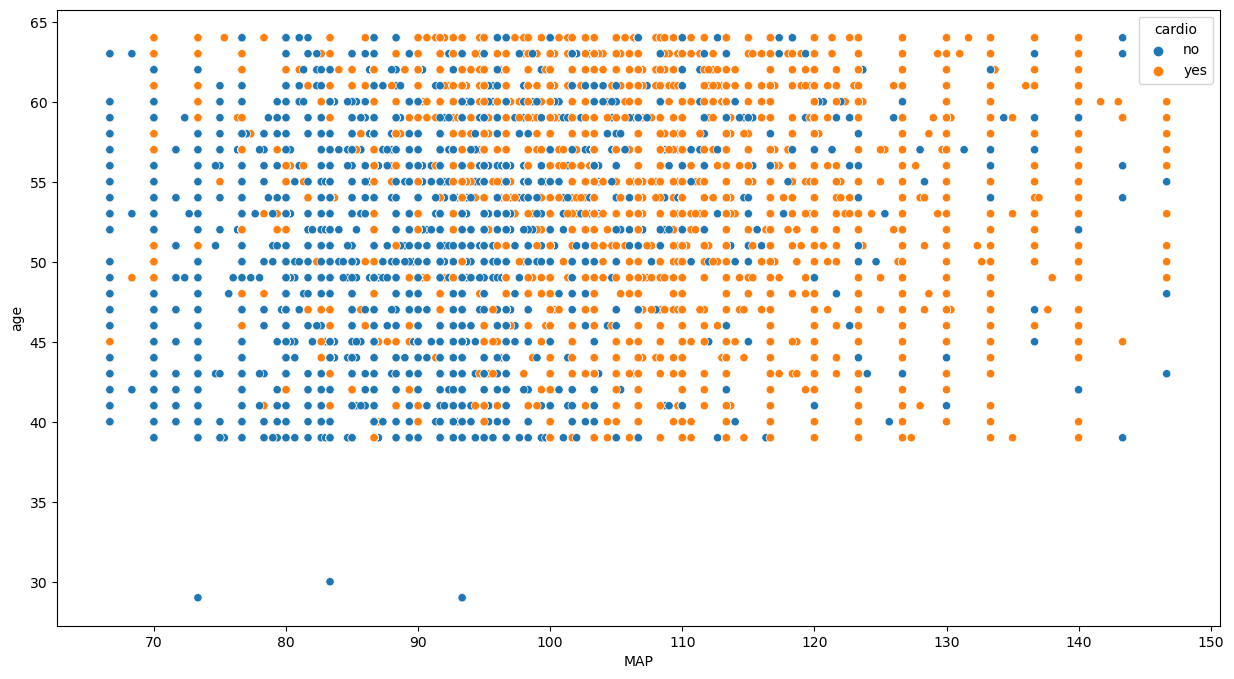

In [80]:
sns.scatterplot(x=df1['MAP'],y=df1['age'],hue=df1['cardio'])

In [ ]:
# for age above 40 as MAP increases chances of cardio increases

<AxesSubplot:xlabel='cholesterol', ylabel='BMI'>

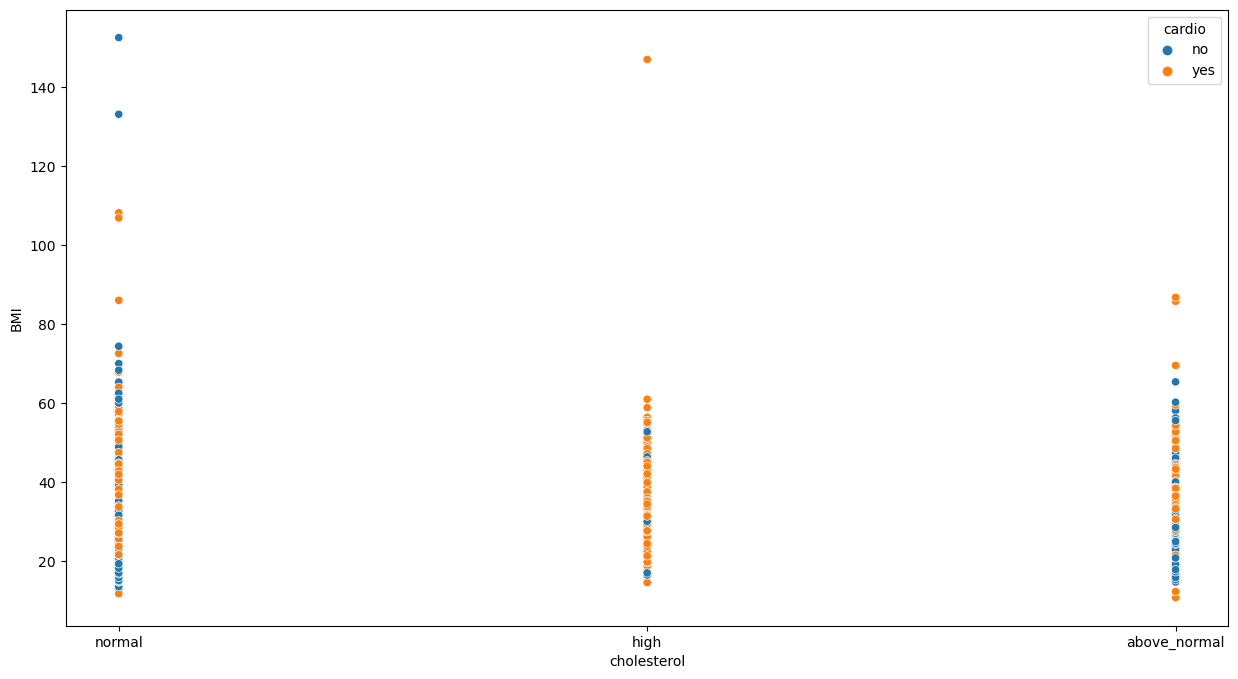

In [82]:
sns.scatterplot(x=df1['cholesterol'],y=df1['BMI'],hue=df1['cardio'])

In [83]:
# most of the people who have high cholesterol have high chances of cardio 

In [78]:
df1_numerical=df1.select_dtypes(include=np.number)
df1_numerical.head()

,age,BMI,MAP
0,50,21.967120,90.000000
1,55,34.927679,106.666667
2,51,23.507805,90.000000
3,48,28.710479,116.666667
4,47,23.011177,73.333333


In [79]:
df1_numerical.skew()

age   -0.304452
BMI    1.830987
MAP    0.509190
dtype: float64

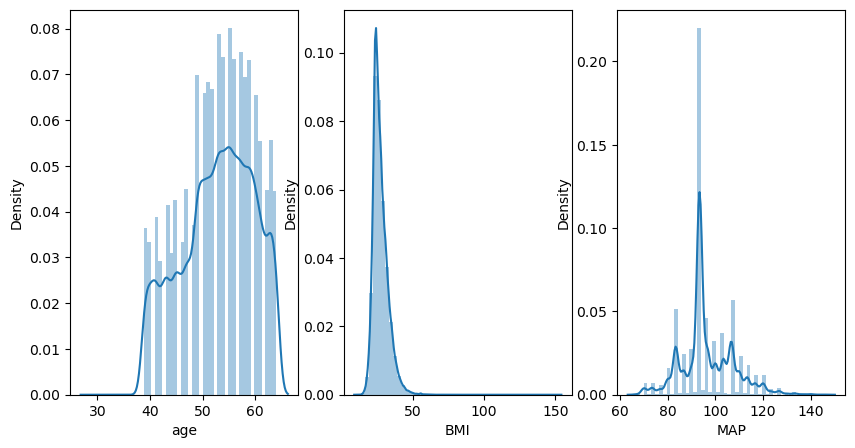

In [80]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(10,5))
for var,subplot in zip(df1_numerical.columns,ax.flatten()):
    sns.distplot(df1_numerical[var],ax=subplot)
plt.show()

#### Transformation of data

In [81]:
from scipy.stats import yeojohnson
df1_numerical['age']=yeojohnson(df1_numerical.age)[0]
df1_numerical['BMI']=yeojohnson(df1_numerical.BMI)[0]
df1_numerical['MAP']=yeojohnson(df1_numerical.MAP)[0]

In [82]:
df1_numerical.skew()

age   -0.086126
BMI   -0.019004
MAP   -0.004549
dtype: float64

In [83]:
for skew in df1_numerical.skew():
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "symmetric", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "symmetric", '\033[0m')

A skewness value of   -0.08612564769932705  means that the distribution is approx.   symmetric 
A skewness value of   -0.01900369716697673  means that the distribution is approx.   symmetric 
A skewness value of   -0.004548688013819034  means that the distribution is approx.   symmetric 


In [84]:
df1_numerical.head()

,age,BMI,MAP
0,1568.088681,0.946669,3.014149
1,1900.394628,0.961756,3.083559
2,1631.931342,0.949303,3.014149
3,1444.321550,0.956171,3.119317
4,1384.394235,0.948491,2.927624


Scaling the data

In [85]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(df1_numerical)
scaled_df=pd.DataFrame(scaled_data,columns=df1_numerical.columns)
scaled_df.head()

,age,BMI,MAP
0,-0.481058,-1.214577,-0.555799
1,0.265825,1.385667,0.965394
2,-0.337567,-0.760485,-0.555799
3,-0.759234,0.423086,1.749069
4,-0.893925,-0.900456,-2.452107


Encoding the categorical variables

In [86]:
gender = {'female':1,  'male':2}
cholesterol = {'normal':1 , 'above_normal':2, 'high':3}
gluc = {'normal':1, 'above_normal':2, 'high':3}
smoke = {'no':0, 'yes':1}
alco = {'no':0,  'yes':1}
active = {'no':0 ,'yes':1 }
cardio = {'no':0,  'yes':1}
# encoding the categorical columns
df1['gender'] = df1['gender'].map(gender)
df1['cholesterol'] = df1['cholesterol'].map(cholesterol)
df1['gluc'] = df1['gluc'].map(gluc)
df1['smoke'] = df1['smoke'].map(smoke)
df1['alco'] = df1['alco'].map(alco)
df1['active'] = df1['active'].map(active)
df1['cardio'] = df1['cardio'].map(cardio)

In [87]:
df1.head()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,50,2,1,1,0,0,1,0,21.967120,90.000000
1,55,1,3,1,0,0,1,1,34.927679,106.666667
2,51,1,3,1,0,0,0,1,23.507805,90.000000
3,48,2,1,1,0,0,1,1,28.710479,116.666667
4,47,1,1,1,0,0,0,0,23.011177,73.333333


converting data type of categorical variables to object

In [88]:
df1['gender']=df1['gender'].astype(object)
df1['cholesterol']=df1['cholesterol'].astype(object)
df1['gluc']=df1['gluc'].astype(object)
df1['smoke']=df1['smoke'].astype(object)
df1['alco']=df1['alco'].astype(object)
df1['active']=df1['active'].astype(object)
df1['cardio']=df1['cardio'].astype(object)

In [89]:
# taking the categorical columns
df1_Categorical=df1.select_dtypes(include=object)
df1_Categorical.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,2,1,1,0,0,1,0
1,1,3,1,0,0,1,1
2,1,3,1,0,0,0,1
3,2,1,1,0,0,1,1
4,1,1,1,0,0,0,0


In [90]:
df1_Categorical.shape

(68453, 7)

concatenate the numerical columns and categorical columns after Transformation

In [91]:
df_transformed=pd.concat([scaled_df,df1_Categorical],axis=1)
df_transformed.head()

,age,BMI,MAP,gender,cholesterol,gluc,smoke,alco,active,cardio
0,-0.481058,-1.214577,-0.555799,2,1,1,0,0,1,0
1,0.265825,1.385667,0.965394,1,3,1,0,0,1,1
2,-0.337567,-0.760485,-0.555799,1,3,1,0,0,0,1
3,-0.759234,0.423086,1.749069,2,1,1,0,0,1,1
4,-0.893925,-0.900456,-2.452107,1,1,1,0,0,0,0


#### Statistical Testing

In [92]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assume "target" is your target variable
target = df_transformed['cardio']

# Separate numeric and categorical features
numeric_features = df_transformed.select_dtypes(include=[np.number]).columns
categorical_features = df_transformed.select_dtypes(include=["object"]).columns

# Step 4: Performing Statistical Tests

# Numeric Feature vs. categorical Target (T-test)
for feature in numeric_features:
    print(f"H0: {feature} of cardio effected people = {feature} of cardio not effected people({feature} not influencing)")
    print(f"H1: {feature} of cardio effected people != {feature} of cardio not effected people({feature} influencing)")
    t_statistic, p_value = ttest_ind(df_transformed[df_transformed["cardio"]==1][feature], df_transformed[df_transformed["cardio"]==0][feature])
    print(f"{feature}: T-statistic = {t_statistic}, p-value = {p_value}")
    if p_value<0.05:
        print(f"reject H0 i.e {feature} is influencing the cardio")
    else:
        print(f"fail to reject H0 i.e {feature} is not influencing cardio")
    print("=====================================================================")

# Categorical Feature vs. Categorical Target (Chi-Squared Test)
for feature in categorical_features:
    print(f"H0:{feature} and cardio are independent")
    print(f"H1:{feature} and cardio are dependent")
    if feature != 'cardio':  # Exclude the target variable itself
        contingency_table = pd.crosstab(df_transformed[feature], target)
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"{feature}: Chi-squared = {chi2}, p-value = {p}")
    if p_value<0.05:
        print(f"reject H0 i.e {feature} and cardio are dependent")
    else:
        print(f"fail to reject H0 i.e {feature} and cardio are independent")
    print("=====================================================================")

H0: age of cardio effected people = age of cardio not effected people(age not influencing)
H1: age of cardio effected people != age of cardio not effected people(age influencing)
age: T-statistic = 64.56894326303542, p-value = 0.0
reject H0 i.e age is influencing the cardio
H0: BMI of cardio effected people = BMI of cardio not effected people(BMI not influencing)
H1: BMI of cardio effected people != BMI of cardio not effected people(BMI influencing)
BMI: T-statistic = 52.47794314716284, p-value = 0.0
reject H0 i.e BMI is influencing the cardio
H0: MAP of cardio effected people = MAP of cardio not effected people(MAP not influencing)
H1: MAP of cardio effected people != MAP of cardio not effected people(MAP influencing)
MAP: T-statistic = 117.79003840425175, p-value = 0.0
reject H0 i.e MAP is influencing the cardio
H0:gender and cardio are independent
H1:gender and cardio are dependent
gender: Chi-squared = 2.9093255063363204, p-value = 0.08806869960003143
reject H0 i.e gender and cardi

from this we can say that all the feature available in df_transaformed are influencing the cardio(Target Variable)

<AxesSubplot:xlabel='cardio', ylabel='count'>

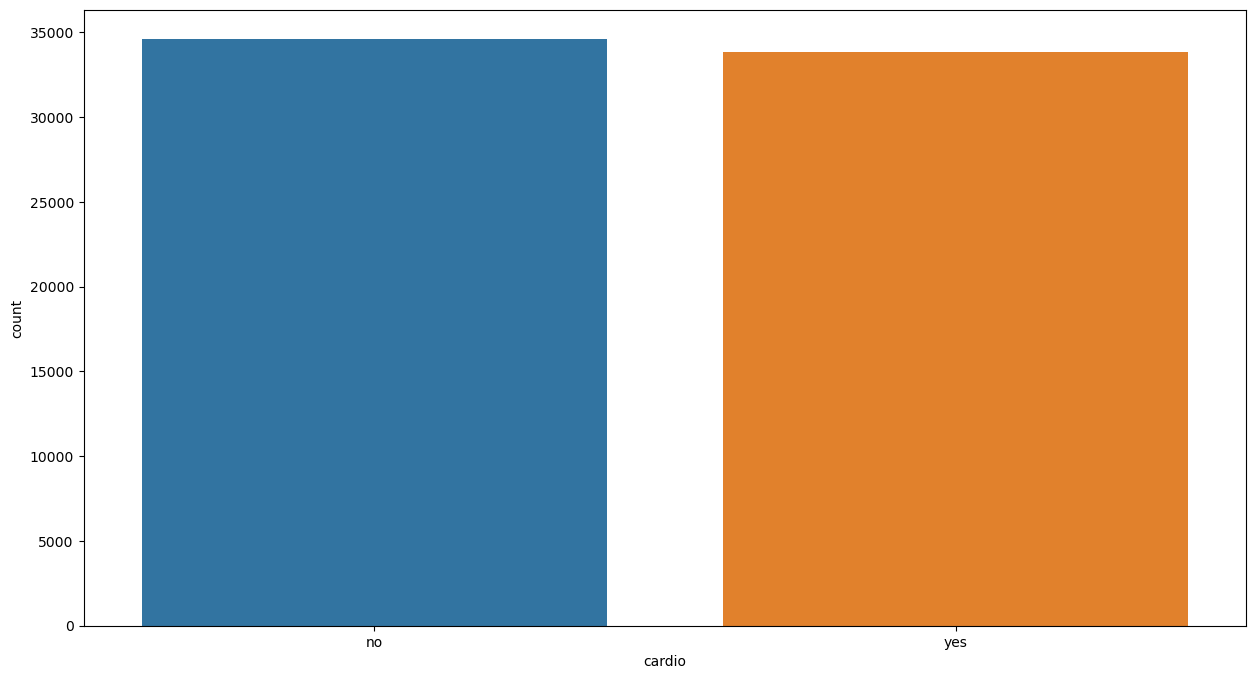

In [93]:
sns.countplot(df['cardio'])

In [94]:
#we can conclude that the Target/Class is balanced. Hence no imbalance treatment is required

In [95]:
df_transformed['gender']=df_transformed['gender'].astype(np.number)
df_transformed['cholesterol']=df_transformed['cholesterol'].astype(np.number)
df_transformed['gluc']=df_transformed['gluc'].astype(np.number)
df_transformed['smoke']=df_transformed['smoke'].astype(np.number)
df_transformed['alco']=df_transformed['alco'].astype(np.number)
df_transformed['active']=df_transformed['active'].astype(np.number)
df_transformed['cardio']=df_transformed['cardio'].astype(np.number)

#### Base Model

In [96]:
X=df_transformed.iloc[:,0:9]
y=df_transformed["cardio"]

In [103]:
df_transformed.columns

Index(['age', 'BMI', 'MAP', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'cardio'],
      dtype='object')

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (47917, 9)
X_test (20536, 9)
y_train (47917,)
y_test (20536,)


### 1) Built Logistic-Regression model:-

In [120]:
# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

# Make predictions on the test data
y_pred_test = model.predict(X_test)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

Accuracy of traindata: 0.72
Confusion Matrix of traindata:
[[18279  5884]
 [ 7451 16303]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.73     24163
         1.0       0.73      0.69      0.71     23754

    accuracy                           0.72     47917
   macro avg       0.72      0.72      0.72     47917
weighted avg       0.72      0.72      0.72     47917

Accuracy of testdata: 0.72
Confusion Matrix of testdata:
[[7934 2509]
 [3164 6929]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.74     10443
         1.0       0.73      0.69      0.71     10093

    accuracy                           0.72     20536
   macro avg       0.72      0.72      0.72     20536
weighted avg       0.72      0.72      0.72     20536



In [97]:
# In logreg model the accuracy score is 72%

### 2) Built KNN model :-

In [122]:
from sklearn.neighbors import KNeighborsClassifier

# Creating a KNN model 
k = 5  # This value can be changed accoding to our desire of neighbours
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)

y_pred_test = knn.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)


Accuracy of traindata: 0.78
Confusion Matrix of traindata:
[[19073  5090]
 [ 5469 18285]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.78      0.79      0.78     24163
         1.0       0.78      0.77      0.78     23754

    accuracy                           0.78     47917
   macro avg       0.78      0.78      0.78     47917
weighted avg       0.78      0.78      0.78     47917

Accuracy of testdata: 0.69
Confusion Matrix of testdata:
[[7282 3161]
 [3229 6864]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.69      0.70      0.70     10443
         1.0       0.68      0.68      0.68     10093

    accuracy                           0.69     20536
   macro avg       0.69      0.69      0.69     20536
weighted avg       0.69      0.69      0.69     20536



In [99]:
# In KNN model the accuracy score is 69%

### 3) Built Gaussian naive bayes model :-

In [123]:
from sklearn.naive_bayes import GaussianNB

GB = GaussianNB()

GB.fit(X_train, y_train)

y_pred_train = GB.predict(X_train)

y_pred_test = GB.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

Accuracy of traindata: 0.69
Confusion Matrix of traindata:
[[19229  4934]
 [ 9745 14009]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.66      0.80      0.72     24163
         1.0       0.74      0.59      0.66     23754

    accuracy                           0.69     47917
   macro avg       0.70      0.69      0.69     47917
weighted avg       0.70      0.69      0.69     47917

Accuracy of testdata: 0.70
Confusion Matrix of testdata:
[[8364 2079]
 [4083 6010]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.67      0.80      0.73     10443
         1.0       0.74      0.60      0.66     10093

    accuracy                           0.70     20536
   macro avg       0.71      0.70      0.70     20536
weighted avg       0.71      0.70      0.70     20536



In [124]:
# In GNB model the accuracy score is 70%

### 4) Built DecisionTreeClassifier model :-

In [125]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=200)

DT.fit(X_train, y_train)

y_pred_train = DT.predict(X_train)

y_pred_test = DT.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

Accuracy of traindata: 0.98
Confusion Matrix of traindata:
[[24059   104]
 [  825 22929]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     24163
         1.0       1.00      0.97      0.98     23754

    accuracy                           0.98     47917
   macro avg       0.98      0.98      0.98     47917
weighted avg       0.98      0.98      0.98     47917

Accuracy of testdata: 0.63
Confusion Matrix of testdata:
[[6720 3723]
 [3935 6158]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.63      0.64      0.64     10443
         1.0       0.62      0.61      0.62     10093

    accuracy                           0.63     20536
   macro avg       0.63      0.63      0.63     20536
weighted avg       0.63      0.63      0.63     20536



In [ ]:
# DTC model is overfitting as train data accuracy is-98% test data accuracy-68% need to do hyper parameter tuning

### 5) Built Random-Forest model :-

In [126]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=400)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

Accuracy of traindata: 0.98
Confusion Matrix of traindata:
[[23810   353]
 [  578 23176]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     24163
         1.0       0.98      0.98      0.98     23754

    accuracy                           0.98     47917
   macro avg       0.98      0.98      0.98     47917
weighted avg       0.98      0.98      0.98     47917

Accuracy of testdata: 0.67
Confusion Matrix of testdata:
[[6938 3505]
 [3173 6920]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.69      0.66      0.68     10443
         1.0       0.66      0.69      0.67     10093

    accuracy                           0.67     20536
   macro avg       0.67      0.67      0.67     20536
weighted avg       0.68      0.67      0.67     20536



In [127]:
# In RF is overfitting as train data accuracy is-98% test data accuracy-67% need to do hyper parameter tuning

In [106]:
# The performence of the models are considerbly close to each other but out of all these -
# the models which performs better are 'Logreg', 'GaussianNB' and 'Decision tree classifier' with 72% accuracy score...

### Boosting  Techniques

### 6) Built BaggingClassifier DT model :-

In [128]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


base_estimator = DecisionTreeClassifier(random_state=42)

bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred_train = bagging_model.predict(X_train)

y_pred_test = bagging_model.predict(X_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

Accuracy of traindata: 0.96
Confusion Matrix of traindata:
[[23561   602]
 [ 1346 22408]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     24163
         1.0       0.97      0.94      0.96     23754

    accuracy                           0.96     47917
   macro avg       0.96      0.96      0.96     47917
weighted avg       0.96      0.96      0.96     47917

Accuracy of testdata: 0.67
Confusion Matrix of testdata:
[[7342 3101]
 [3745 6348]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.66      0.70      0.68     10443
         1.0       0.67      0.63      0.65     10093

    accuracy                           0.67     20536
   macro avg       0.67      0.67      0.67     20536
weighted avg       0.67      0.67      0.67     20536



In [129]:
# In BaggingClassifier DT is overfitting as train data accuracy is-96% test data accuracy-67% need to do hyper parameter tuning

### 7) Built BaggingClassifier-KNN model :-

In [130]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


base_estimator = KNeighborsClassifier(n_neighbors=5)

bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred_train = bagging_model.predict(X_train)

y_pred_test = bagging_model.predict(X_test)


print("Bagging Classifier with K-Nearest Neighbors (KNN) base estimator:")
# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)


Bagging Classifier with K-Nearest Neighbors (KNN) base estimator:
Accuracy of traindata: 0.79
Confusion Matrix of traindata:
[[19361  4802]
 [ 5463 18291]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79     24163
         1.0       0.79      0.77      0.78     23754

    accuracy                           0.79     47917
   macro avg       0.79      0.79      0.79     47917
weighted avg       0.79      0.79      0.79     47917

Accuracy of testdata: 0.69
Confusion Matrix of testdata:
[[7411 3032]
 [3278 6815]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.69      0.71      0.70     10443
         1.0       0.69      0.68      0.68     10093

    accuracy                           0.69     20536
   macro avg       0.69      0.69      0.69     20536
weighted avg       0.69      0.69      0.69     20536



In [110]:
# accuracy is about 69% for Bagging Classifier KNN

### 8) Built BaggingClassifier-logr model :-

In [131]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression


base_estimator = LogisticRegression(random_state=42)

bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred_train = bagging_model.predict(X_train)

y_pred_test = bagging_model.predict(X_test)

print("Bagging Classifier with Logistic Regression base estimator:")

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

Bagging Classifier with Logistic Regression base estimator:
Accuracy of traindata: 0.72
Confusion Matrix of traindata:
[[18300  5863]
 [ 7477 16277]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.73     24163
         1.0       0.74      0.69      0.71     23754

    accuracy                           0.72     47917
   macro avg       0.72      0.72      0.72     47917
weighted avg       0.72      0.72      0.72     47917

Accuracy of testdata: 0.72
Confusion Matrix of testdata:
[[7939 2504]
 [3177 6916]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.74     10443
         1.0       0.73      0.69      0.71     10093

    accuracy                           0.72     20536
   macro avg       0.72      0.72      0.72     20536
weighted avg       0.72      0.72      0.72     20536



In [112]:
# accuracy is about 72% for Bagging Classifier logistic regression

### 9) Built AdaBoostClassifier-Descision tree model :-

In [132]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

adaboost_model.fit(X_train, y_train)


y_pred_train = adaboost_model.predict(X_train)

y_pred_test = adaboost_model.predict(X_test)


print("AdaBoost Classifier with Decision Tree base estimator:")

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

AdaBoost Classifier with Decision Tree base estimator:
Accuracy of traindata: 0.72
Confusion Matrix of traindata:
[[18967  5196]
 [ 8095 15659]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.70      0.78      0.74     24163
         1.0       0.75      0.66      0.70     23754

    accuracy                           0.72     47917
   macro avg       0.73      0.72      0.72     47917
weighted avg       0.73      0.72      0.72     47917

Accuracy of testdata: 0.72
Confusion Matrix of testdata:
[[8224 2219]
 [3449 6644]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.70      0.79      0.74     10443
         1.0       0.75      0.66      0.70     10093

    accuracy                           0.72     20536
   macro avg       0.73      0.72      0.72     20536
weighted avg       0.73      0.72      0.72     20536



In [114]:
# accuracy is about 72% for Adaboost Classifier DT

### 10) Built AdaBoostClassifier-Random Forest model :-

In [146]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier



base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

adaboost_model.fit(X_train, y_train)

y_pred_train = adaboost_model.predict(X_train)

y_pred_test = adaboost_model.predict(X_test)



print("AdaBoost Classifier with Random Forest base estimator:")

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

AdaBoost Classifier with Random Forest base estimator:
Accuracy of traindata: 0.98
Confusion Matrix of traindata:
[[23779   384]
 [  545 23209]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     24163
         1.0       0.98      0.98      0.98     23754

    accuracy                           0.98     47917
   macro avg       0.98      0.98      0.98     47917
weighted avg       0.98      0.98      0.98     47917

Accuracy of testdata: 0.68
Confusion Matrix of testdata:
[[6916 3527]
 [3108 6985]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.69      0.66      0.68     10443
         1.0       0.66      0.69      0.68     10093

    accuracy                           0.68     20536
   macro avg       0.68      0.68      0.68     20536
weighted avg       0.68      0.68      0.68     20536



In [ ]:
# Adaboost Classifier RF is overfitting

### 11) Built GradientBoostingClassifier model :-

In [117]:
from sklearn.ensemble import GradientBoostingClassifier



gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, 
                                    learning_rate=0.1, random_state=42)

gradient_boosting_model.fit(X_train, y_train)

y_pred_train = gradient_boosting_model.predict(X_train)
y_pred_test = gradient_boosting_model.predict(X_test)

print("Gradient Boosting Classifier")
# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)



# Get the feature importances
feature_importances = gradient_boosting_model.feature_importances_

d={}
feature_names = ['age', 'BMI', 'MAP', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active']
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")
    d[feature_name]=importance

# Sort the dictionary by values in ascending order
sorted_dict = {key: value for key, value in sorted(d.items(), key=lambda item: item[1],reverse=True)}

# Print the sorted dictionary
print(sorted_dict)

Gradient Boosting Classifier
Accuracy of traindata: 0.73
Confusion Matrix of traindata:
[[18351  5812]
 [ 7104 16650]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     24163
         1.0       0.74      0.70      0.72     23754

    accuracy                           0.73     47917
   macro avg       0.73      0.73      0.73     47917
weighted avg       0.73      0.73      0.73     47917

Accuracy of testdata: 0.73
Confusion Matrix of testdata:
[[7958 2485]
 [3066 7027]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     10443
         1.0       0.74      0.70      0.72     10093

    accuracy                           0.73     20536
   macro avg       0.73      0.73      0.73     20536
weighted avg       0.73      0.73      0.73     20536

age: 0.13865631819016158
BMI: 0.03100042581048092
MAP: 0.7282722060701

In [ ]:
# accuracy is about 73% for gradiant boosting classifier

### 12) Built XGB model :-

In [ ]:
!pip install xgboost

In [140]:
import xgboost as xgb
from xgboost import XGBClassifier


xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_model.fit(X_train, y_train)
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)
print("XGBoost Classifier:")

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)


# Get the feature importances
feature_importances = xgb_model.feature_importances_


feature_names = ['age', 'BMI', 'MAP', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active']
d={}
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")
    d[feature_name]=importance
# Sort the dictionary by values in ascending order
sorted_dict = {key: value for key, value in sorted(d.items(), key=lambda item: item[1],reverse=True)}

# Print the sorted dictionary
print(sorted_dict)

XGBoost Classifier:
Accuracy of traindata: 0.74
Confusion Matrix of traindata:
[[18645  5518]
 [ 6893 16861]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.73      0.77      0.75     24163
         1.0       0.75      0.71      0.73     23754

    accuracy                           0.74     47917
   macro avg       0.74      0.74      0.74     47917
weighted avg       0.74      0.74      0.74     47917

Accuracy of testdata: 0.73
Confusion Matrix of testdata:
[[7968 2475]
 [3073 7020]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     10443
         1.0       0.74      0.70      0.72     10093

    accuracy                           0.73     20536
   macro avg       0.73      0.73      0.73     20536
weighted avg       0.73      0.73      0.73     20536

age: 0.1041204109787941
BMI: 0.03417346253991127
MAP: 0.4869387149810791
gender

In [ ]:
# accuracy is about 73% for XGBoost Classifier
# MAP, age, cholesterol,active,gluc are the important features in the model
# As per EDA
## high MAP increses the probability of heart attack
## high Cholesterol increses the probability of heart attack
## After certain Age like in this data, after 55 & 57 yrs has high probobaility of heart attack
## high gluc increses the probability of heart attack
## Doing physical activity reduces the probability of heart attack

# After age> 40 if below variables are high it increases the probabilty of heart attack
## MAP
## Cholestrol
## glucose
# doing physical activity decreases the chance of heart attack and we can also say that people doing physical activity has more
# chances of having normal cholesterol, normal gluc.

#So Business need to look at Age,Cholestrol,glucose,MAP, Physical activity and take more care for people who are age>40,
# identify ways to control cholesterol, glucose, MAP and suggest people to do Physical acitivity.




### Hyper Parameter Tuning

### For Random Forest Classifier

In [138]:
from sklearn.model_selection import GridSearchCV

In [155]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

KeyboardInterrupt: 

In [136]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = 'gini',
                                  n_estimators = 30,
                                  max_depth = 10,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Hyper Parameter tuning for RF Classifier:")

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

Hyper Parameter tuning for RF Classifier:
Accuracy of traindata: 0.72
Confusion Matrix of traindata:
[[18302  5861]
 [ 7498 16256]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.73     24163
         1.0       0.74      0.68      0.71     23754

    accuracy                           0.72     47917
   macro avg       0.72      0.72      0.72     47917
weighted avg       0.72      0.72      0.72     47917

Accuracy of testdata: 0.72
Confusion Matrix of testdata:
[[7940 2503]
 [3202 6891]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.71      0.76      0.74     10443
         1.0       0.73      0.68      0.71     10093

    accuracy                           0.72     20536
   macro avg       0.72      0.72      0.72     20536
weighted avg       0.72      0.72      0.72     20536



In [ ]:
# acuuracy is about 72% for RF with hyper parameter tuning

### For XGBClassifer

In [150]:
from sklearn.model_selection import GridSearchCV
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_,'\n')

Best parameters for XGBoost classifier:  {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3} 



In [142]:

xgb_model = XGBClassifier(n_estimators =100,gamma= 1, learning_rate= 0.1, max_depth= 3)

xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)

y_pred_test = xgb_model.predict(X_test)

print("Hyper parameter tuning for XGB Classifier:")

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

Hyper parameter tuning for XGB Classifier:
Accuracy of traindata: 0.73
Confusion Matrix of traindata:
[[18368  5795]
 [ 7156 16598]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     24163
         1.0       0.74      0.70      0.72     23754

    accuracy                           0.73     47917
   macro avg       0.73      0.73      0.73     47917
weighted avg       0.73      0.73      0.73     47917

Accuracy of testdata: 0.73
Confusion Matrix of testdata:
[[7982 2461]
 [3086 7007]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     10443
         1.0       0.74      0.69      0.72     10093

    accuracy                           0.73     20536
   macro avg       0.73      0.73      0.73     20536
weighted avg       0.73      0.73      0.73     20536



In [ ]:
# acuuracy is about 73% for XGB with hyper parameter tuning

### For Decision Tree Classifier

In [152]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 5),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,5),
                     'min_samples_leaf': range(1,5),
                     'max_leaf_nodes': range(1, 5)}]
 

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [154]:
dt_model = DecisionTreeClassifier(criterion= 'entropy',
                                  max_depth= 2,
                                  max_features= 'sqrt',
                                  max_leaf_nodes= 3,
                                  min_samples_leaf= 1,
                                  min_samples_split= 2)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

print(" Hyper parameter tuning for Decision Tree base estimator:")

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
confusion_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print(f"Accuracy of traindata: {accuracy_train:.2f}")
print(f"Confusion Matrix of traindata:\n{confusion_train}")
print("Classification Report of traindata:\n", classification_rep_train)


accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_test = confusion_matrix(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Print the results
print(f"Accuracy of testdata: {accuracy_test:.2f}")
print(f"Confusion Matrix of testdata:\n{confusion_test}")
print("Classification Report of testdata:\n", classification_rep_test)

 Hyper parameter tuning for Decision Tree base estimator:
Accuracy of traindata: 0.59
Confusion Matrix of traindata:
[[22720  1443]
 [18088  5666]]
Classification Report of traindata:
               precision    recall  f1-score   support

         0.0       0.56      0.94      0.70     24163
         1.0       0.80      0.24      0.37     23754

    accuracy                           0.59     47917
   macro avg       0.68      0.59      0.53     47917
weighted avg       0.68      0.59      0.53     47917

Accuracy of testdata: 0.60
Confusion Matrix of testdata:
[[9855  588]
 [7584 2509]]
Classification Report of testdata:
               precision    recall  f1-score   support

         0.0       0.57      0.94      0.71     10443
         1.0       0.81      0.25      0.38     10093

    accuracy                           0.60     20536
   macro avg       0.69      0.60      0.54     20536
weighted avg       0.69      0.60      0.55     20536



In [145]:
# acuuracy is about 60% for DT with hyper parameter tuning